<center><p float="center">
   
</p></center>

<h1><center><font size=10>Data Science and Business Analytics</center></font></h1>
<h1><center>Healthcare Capstone Project work</center></h1>

# Problem statement

### Context
Healthcare is an important domain to determine an individual's life. Money is an important factor in Healthcare sector where the Insurance companies plays a major role. The company provides a support in financial base to each individual by helping in hospital or health bills. If an individual is unaware of his health and routine check-up's/ follow-ups may affect his/her life in hospital which may be a risk factor to an insurance company. In order to optimise the insurance-cost, analysing various parameters of an individual may help to reduce the risk of financial company.

### Objective
As a Data analyst, the aim is to build a model to optimise the insurance cost of an individual with the help of various parameters like their health habits from the given dataset

### Data Description
The Target variable is `insurance_cost`


- applicant_id               : Applicant unique ID
- years_of_insurance_with_us : Since how many years customer is taking policy from the same company only
- regular_checkup_lasy_year  : Number of times customers has done the regular health check up in last one year
- adventure_sports           : Customer is involved with adventure sports like climbing, diving etc.
- Occupation                 : Occupation of the customer
- visited_doctor_last_1_year : Number of times customer has visited doctor in last one year
- cholesterol_level : Cholesterol level of the customers while applying for insurance
- daily_avg_steps : Average daily steps walked by customers
- age : Age of the customer
- heart_decs_history : Any past heart diseases
- other_major_decs_history :  Any past major diseases apart from heart like any operation
- Gender : Gender of the customer
- avg_glucose_level : Average glucose level of the customer while applying the insurance
- bmi : BMI of the customer while applying the insurance
- smoking_status : Smoking status of the customer
- Year_last_admitted : When customer have been admitted in the hospital last time
- Location : Location of the hospital
- weight : Weight of the customer
- covered_by_any_other_company : Customer is covered from any other insurance company
- Alcohol : Alcohol consumption status of the customer
- exercise : Regular exercise status of the customer
- weight_change_in_last_one_year : How much variation has been seen in the weight of the customer in last year
- fat_percentage :  Fat percentage of the customer while applying the insurance
- insurance_cost : Total Insurance cost

# Importing necessary libraries


In [1]:
# To read and manipulate data
import numpy as np
import pandas as pd

#To visualisinf and plotting the datasets
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# to split data into train and test
from sklearn.model_selection import train_test_split

# To build linear regression model
import statsmodels.api as sm

# To check the model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Data overview

## Loading the data

In [2]:
data = pd.read_csv('C:/Users/CHRISTO JOHN THOMAS/Downloads/Data.csv')
data.head()

applicant_id  years_of_insurance_with_us  regular_checkup_lasy_year  \
0          5000                           3                          1   
1          5001                           0                          0   
2          5002                           1                          0   
3          5003                           7                          4   
4          5004                           3                          1   

   adventure_sports Occupation  visited_doctor_last_1_year cholesterol_level  \
0                 1    Salried                           2        125 to 150   
1                 0    Student                           4        150 to 175   
2                 0   Business                           4        200 to 225   
3                 0   Business                           2        175 to 200   
4                 0    Student                           2        150 to 175   

   daily_avg_steps  age  heart_decs_history  ...   smoking_status  \
0             4866   28                   1  ...          Unknown   
1             6411   50                   0  ...  formerly smoked   
2             4509   68                   0  ...  formerly smoked   
3             6214   51                   0  ...          Unknown   
4             4938   44                   0  ...     never smoked   

  Year_last_admitted   Location  weight covered_by_any_other_company  Alcohol  \
0                NaN    Chennai      67                            N     Rare   
1                NaN     Jaipur      58                            N     Rare   
2                NaN     Jaipur      73                            N    Daily   
3                NaN    Chennai      71                            Y     Rare   
4             2004.0  Bangalore      74                            N       No   

   exercise  weight_change_in_last_one_year fat_percentage insurance_cost  
0  Moderate                               1             25          20978  
1  Moderate                               3             27           6170  
2   Extreme                               0             32          28382  
3        No                               3             37          27148  
4   Extreme                               0             34          29616  

[5 rows x 24 columns]

In [3]:
data.tail()

applicant_id  years_of_insurance_with_us  regular_checkup_lasy_year  \
24995         29995                           3                          0   
24996         29996                           6                          0   
24997         29997                           7                          0   
24998         29998                           1                          0   
24999         29999                           8                          2   

       adventure_sports Occupation  visited_doctor_last_1_year  \
24995                 0    Salried                           4   
24996                 0   Business                           4   
24997                 1    Student                           2   
24998                 0    Salried                           2   
24999                 0   Business                           4   

      cholesterol_level  daily_avg_steps  age  heart_decs_history  ...  \
24995        225 to 250             5614   22                   0  ...   
24996        200 to 225             4719   58                   0  ...   
24997        150 to 175             5624   34                   0  ...   
24998        225 to 250            10777   27                   0  ...   
24999        150 to 175             5882   22                   1  ...   

        smoking_status Year_last_admitted     Location  weight  \
24995           smokes             2000.0       Kanpur      79   
24996     never smoked             2009.0       Kanpur      66   
24997          Unknown                NaN  Bhubaneswar      76   
24998          Unknown                NaN        Surat      74   
24999  formerly smoked             2014.0      Chennai      57   

      covered_by_any_other_company  Alcohol  exercise  \
24995                            Y     Rare  Moderate   
24996                            N     Rare  Moderate   
24997                            N     Rare  Moderate   
24998                            N     Rare  Moderate   
24999                            N       No        No   

       weight_change_in_last_one_year fat_percentage insurance_cost  
24995                               4             40          39488  
24996                               2             28          14808  
24997                               1             35          33318  
24998                               0             40          30850  
24999                               4             21           6170  

[5 rows x 24 columns]

## Checking the shape of the column

In [4]:
print('The number of rows and columns of the given dataset: ', data.shape)

The number of rows and columns of the given dataset:  (25000, 24)


## Data information

In [9]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   applicant_id                    25000 non-null  int64  
 1   years_of_insurance_with_us      25000 non-null  int64  
 2   regular_checkup_lasy_year       25000 non-null  int64  
 3   adventure_sports                25000 non-null  int64  
 4   Occupation                      25000 non-null  object 
 5   visited_doctor_last_1_year      25000 non-null  int64  
 6   cholesterol_level               25000 non-null  object 
 7   daily_avg_steps                 25000 non-null  int64  
 8   age                             25000 non-null  int64  
 9   heart_decs_history              25000 non-null  int64  
 10  other_major_decs_history        25000 non-null  int64  
 11  Gender                          25000 non-null  object 
 12  avg_glucose_level               

* There are 2 float and 14 integer datatypes as numerical and 8 object datatypes present in the dataset

## Data summary

In [11]:
data.describe(include = 'all').T

count unique           top   freq  \
applicant_id                    25000.0    NaN           NaN    NaN   
years_of_insurance_with_us      25000.0    NaN           NaN    NaN   
regular_checkup_lasy_year       25000.0    NaN           NaN    NaN   
adventure_sports                25000.0    NaN           NaN    NaN   
Occupation                        25000      3       Student  10169   
visited_doctor_last_1_year      25000.0    NaN           NaN    NaN   
cholesterol_level                 25000      5    150 to 175   8763   
daily_avg_steps                 25000.0    NaN           NaN    NaN   
age                             25000.0    NaN           NaN    NaN   
heart_decs_history              25000.0    NaN           NaN    NaN   
other_major_decs_history        25000.0    NaN           NaN    NaN   
Gender                            25000      2          Male  16422   
avg_glucose_level               25000.0    NaN           NaN    NaN   
bmi                             24010.0    NaN           NaN    NaN   
smoking_status                    25000      4  never smoked   9249   
Year_last_admitted              13119.0    NaN           NaN    NaN   
Location                          25000     15     Bangalore   1742   
weight                          25000.0    NaN           NaN    NaN   
covered_by_any_other_company      25000      2             N  17418   
Alcohol                           25000      3          Rare  13752   
exercise                          25000      3      Moderate  14638   
weight_change_in_last_one_year  25000.0    NaN           NaN    NaN   
fat_percentage                  25000.0    NaN           NaN    NaN   
insurance_cost                  25000.0    NaN           NaN    NaN   

                                       mean           std     min       25%  \
applicant_id                        17499.5   7217.022701  5000.0  11249.75   
years_of_insurance_with_us          4.08904      2.606612     0.0       2.0   
regular_checkup_lasy_year           0.77368      1.199449     0.0       0.0   
adventure_sports                    0.08172      0.273943     0.0       0.0   
Occupation                              NaN           NaN     NaN       NaN   
visited_doctor_last_1_year           3.1042      1.141663     0.0       2.0   
cholesterol_level                       NaN           NaN     NaN       NaN   
daily_avg_steps                  5215.88932   1053.179748  2034.0    4543.0   
age                                44.91832     16.107492    16.0      31.0   
heart_decs_history                  0.05464      0.227281     0.0       0.0   
other_major_decs_history            0.09816      0.297537     0.0       0.0   
Gender                                  NaN           NaN     NaN       NaN   
avg_glucose_level                    167.53     62.729712    57.0     113.0   
bmi                               31.393328      7.876535    12.3      26.1   
smoking_status                          NaN           NaN     NaN       NaN   
Year_last_admitted              2003.892217      7.581521  1990.0    1997.0   
Location                                NaN           NaN     NaN       NaN   
weight                             71.61048      9.325183    52.0      64.0   
covered_by_any_other_company            NaN           NaN     NaN       NaN   
Alcohol                                 NaN           NaN     NaN       NaN   
exercise                                NaN           NaN     NaN       NaN   
weight_change_in_last_one_year      2.51796      1.690335     0.0       1.0   
fat_percentage                     28.81228      8.632382    11.0      21.0   
insurance_cost                  27147.40768  14323.691832  2468.0   16042.0   

                                    50%       75%      max  
applicant_id                    17499.5  23749.25  29999.0  
years_of_insurance_with_us          4.0       6.0      8.0  
regular_checkup_lasy_year           0.0       1.0      5.0  
adventure_sports                    0.

## Checking for missing and duplicate values

In [13]:
data.duplicated().sum()

0

In [15]:
data.isnull().sum()

applicant_id                          0
years_of_insurance_with_us            0
regular_checkup_lasy_year             0
adventure_sports                      0
Occupation                            0
visited_doctor_last_1_year            0
cholesterol_level                     0
daily_avg_steps                       0
age                                   0
heart_decs_history                    0
other_major_decs_history              0
Gender                                0
avg_glucose_level                     0
bmi                                 990
smoking_status                        0
Year_last_admitted                11881
Location                              0
weight                                0
covered_by_any_other_company          0
Alcohol                               0
exercise                              0
weight_change_in_last_one_year        0
fat_percentage                        0
insurance_cost                        0
dtype: int64

* There is no missing values
* There are missing values in 2 columns: `bmi` and `Year_last_admitted`

In [17]:
data['Year_last_admitted'].value_counts().sort_index(ascending = True)

Year_last_admitted
1990.0    122
1991.0    276
1992.0    382
1993.0    508
1994.0    514
1995.0    538
1996.0    487
1997.0    513
1998.0    514
1999.0    498
2000.0    516
2001.0    507
2002.0    520
2003.0    504
2004.0    481
2005.0    491
2006.0    472
2007.0    532
2008.0    503
2009.0    512
2010.0    557
2011.0    475
2012.0    483
2013.0    516
2014.0    496
2015.0    449
2016.0    370
2017.0    253
2018.0    130
Name: count, dtype: int64

In [19]:
print(data['Year_last_admitted'].unique())

[  nan 2004. 2003. 2007. 1994. 2010. 2017. 2002. 1996. 2008. 1991. 1995.
 2001. 2013. 2011. 2005. 2018. 1998. 1997. 1999. 1992. 2012. 2009. 2014.
 2000. 1993. 2016. 2006. 2015. 1990.]


In [21]:
# creating a copy to preserve original data
df = data.copy()

# Exploratory Data Analysis

## Univariate analysis

In [23]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [25]:
# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        hue=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

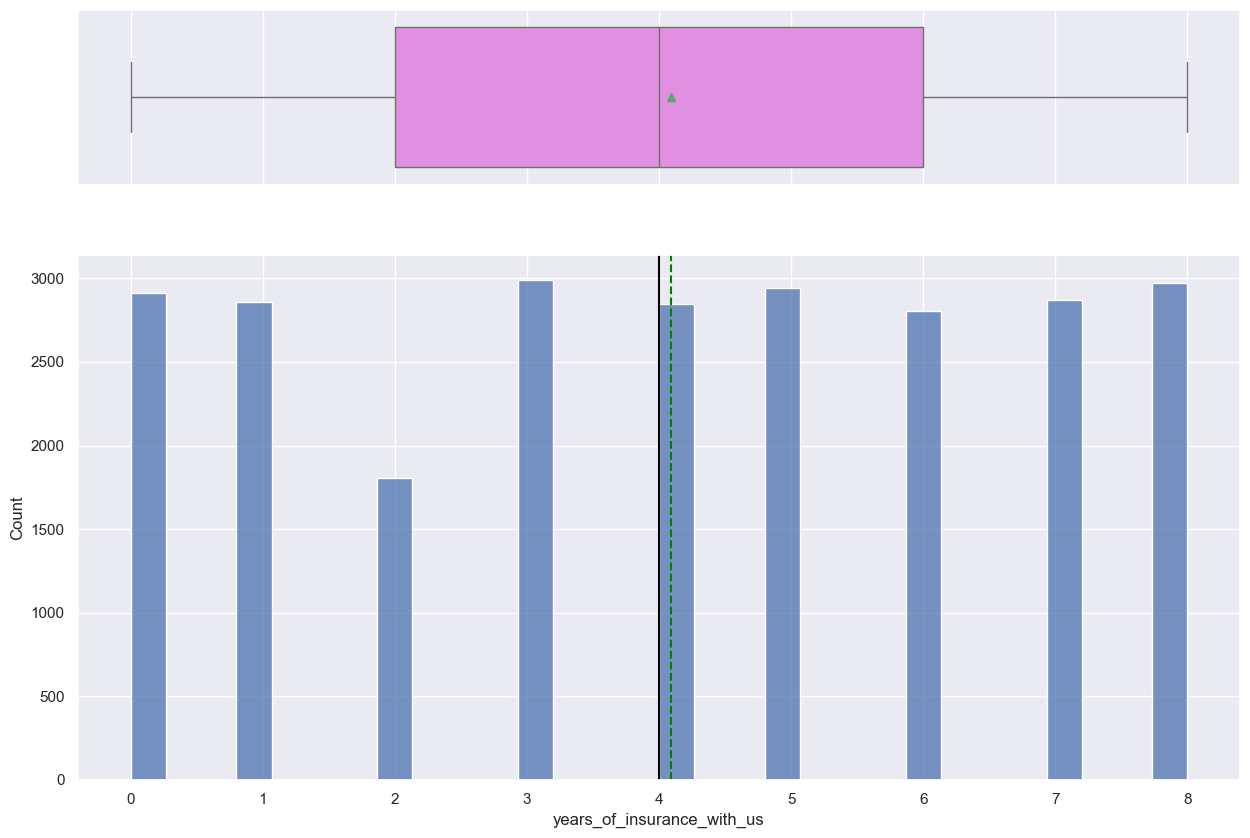

In [29]:
 histogram_boxplot(df, 'years_of_insurance_with_us')

* Even distribution, where most of the individuals having 4 years of insurance with the company

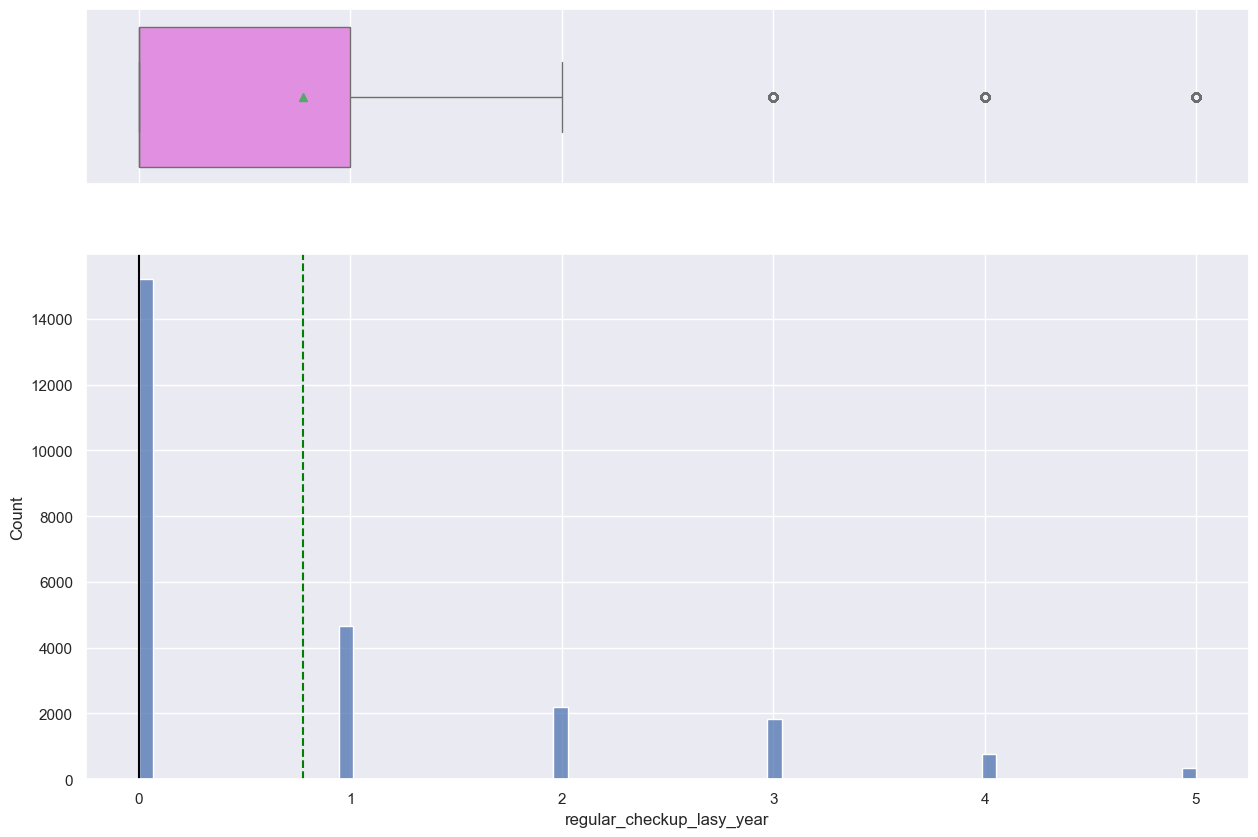

In [31]:
 histogram_boxplot(df, 'regular_checkup_lasy_year')

* There is a typo error in the column name, need to be change
* Most of the individuals not done any regular check up, its showing a right skewed distribution 

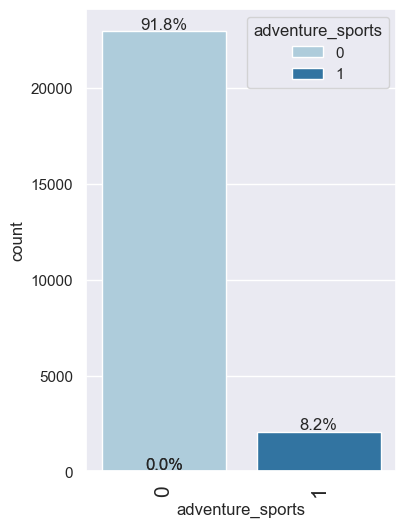

In [33]:
labeled_barplot(df, 'adventure_sports', perc =True)

* Its a binary variable, most of them are not active in any sports activities

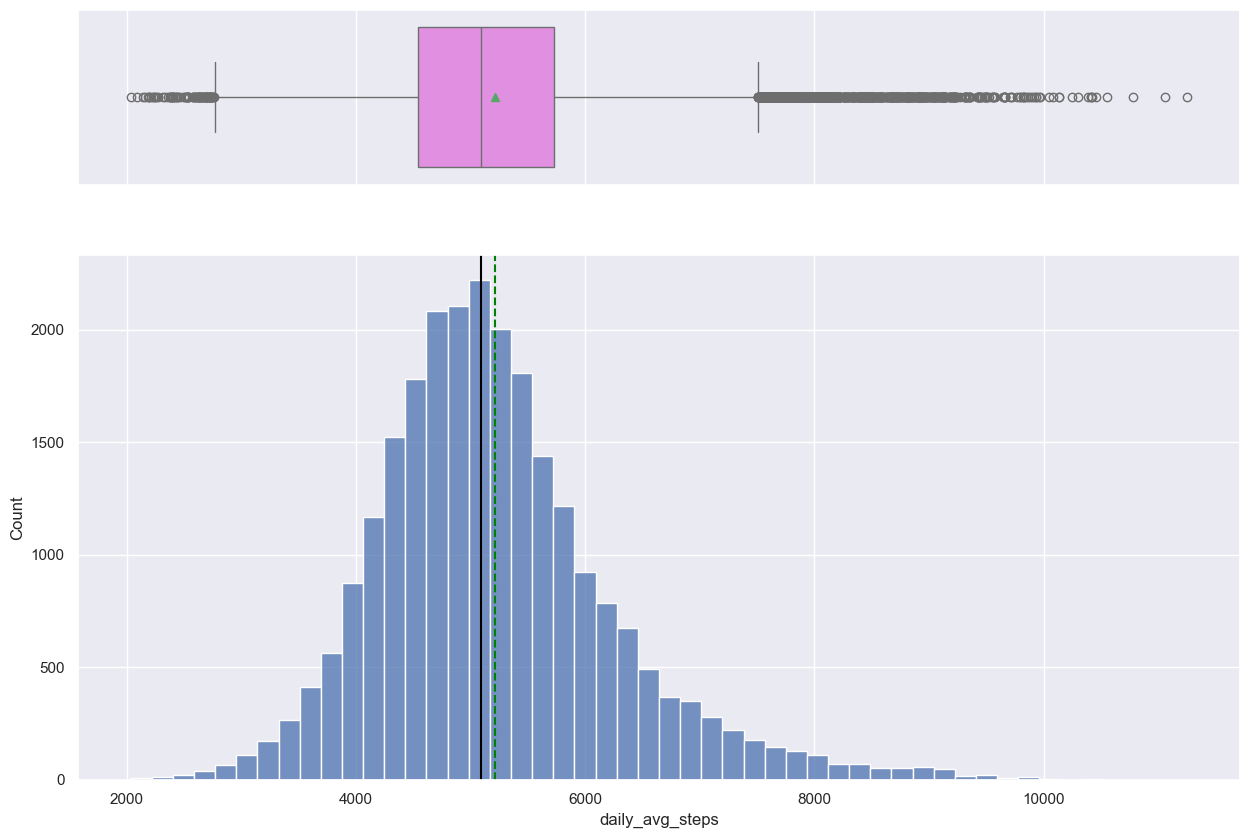

In [35]:
histogram_boxplot(df, 'daily_avg_steps', bins = 50)

* The distribution shows a normal distribution, with the mean of ~5000 steps
* The boxplot visuals also shows many outliers are present

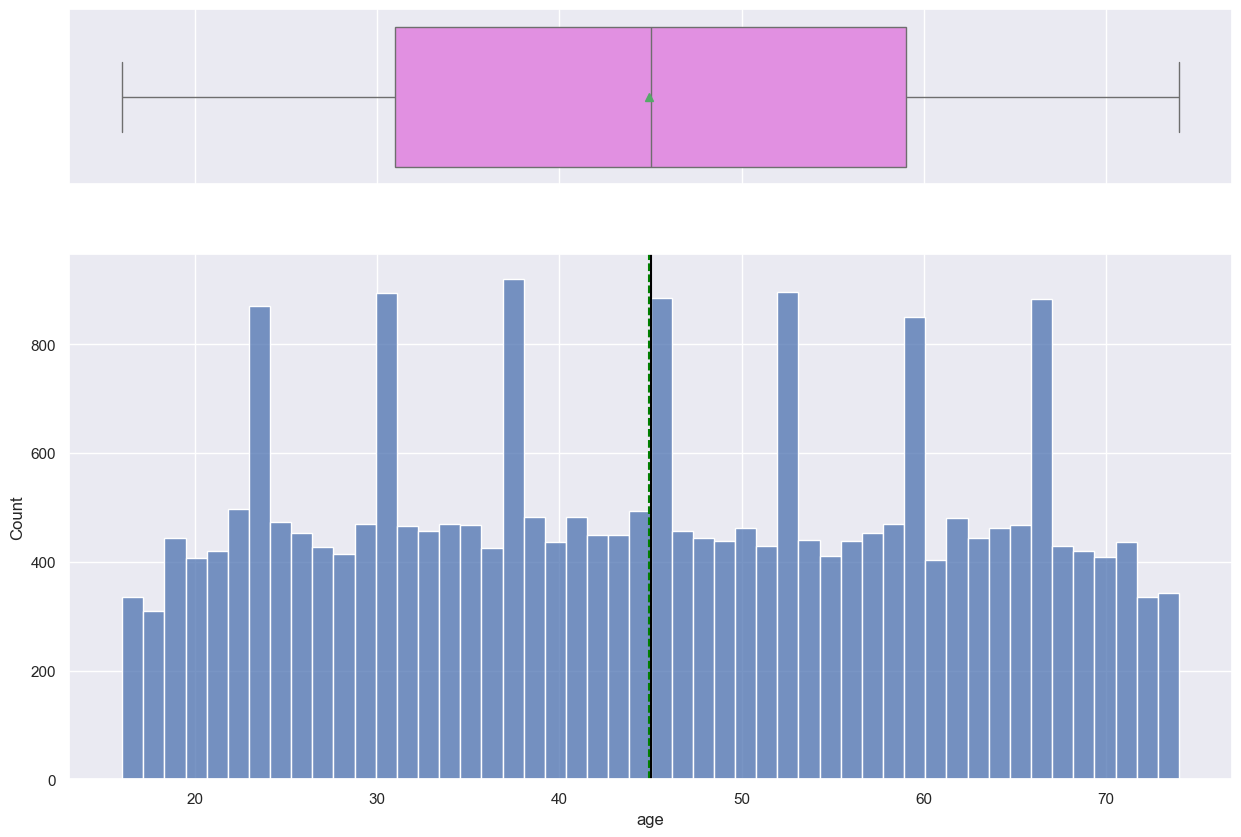

In [37]:
histogram_boxplot(df, 'age', bins = 50)

* Age is showing an uneven distribution, average category belongs to ~45 years 

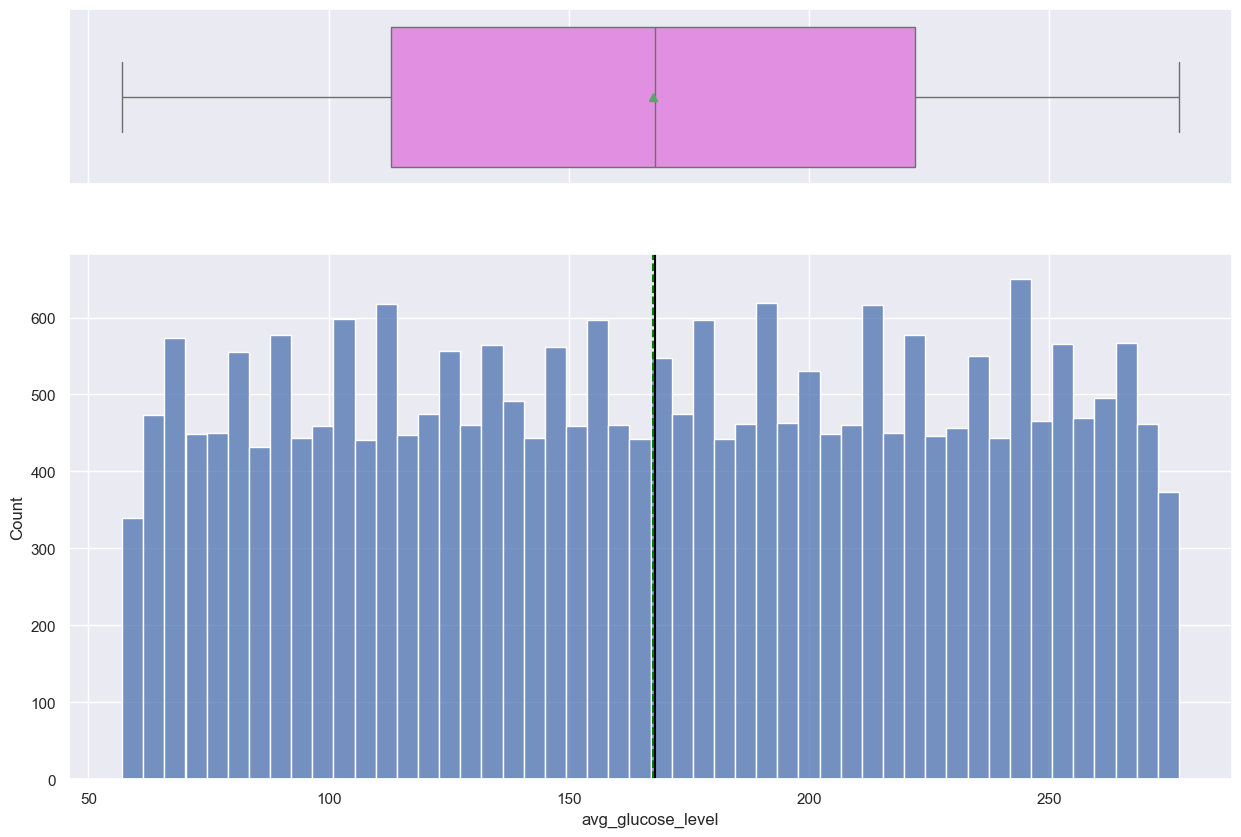

In [39]:
histogram_boxplot(df, 'avg_glucose_level', bins = 50)

* Average glucose level is ~155 in count also an uneven distribution

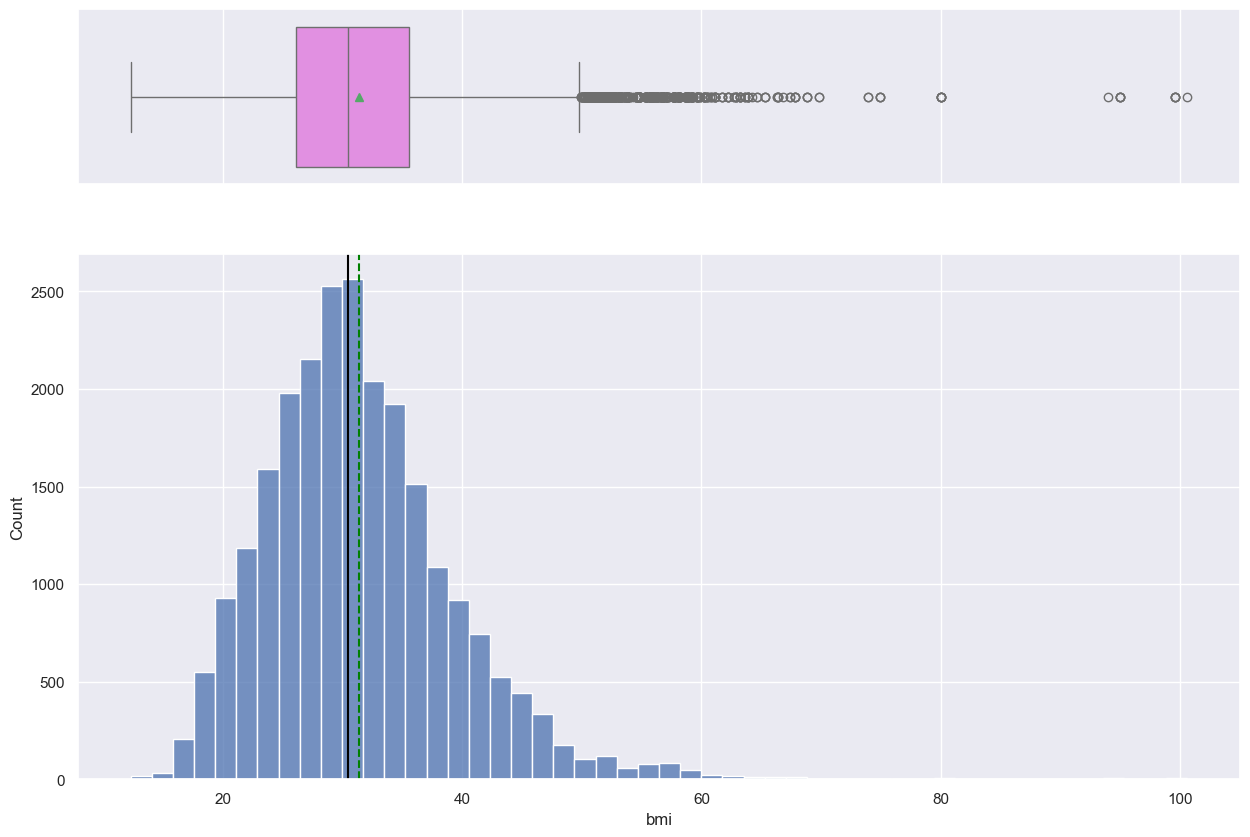

In [41]:
histogram_boxplot(df, 'bmi', bins = 50)

* BMI data shows a slight right skeweness
* In boxplot, many outliers can also seen towards the right side
* Missing values are there, which need to be treated

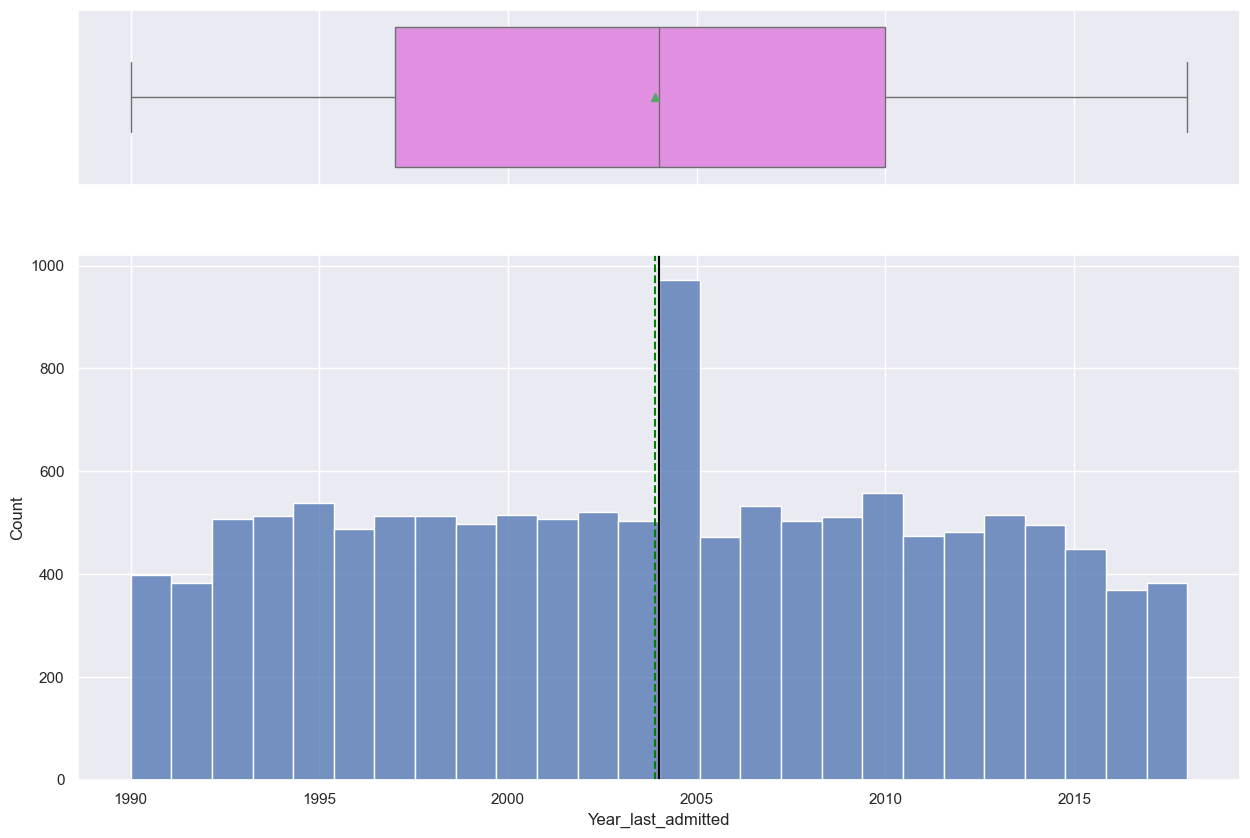

In [43]:
histogram_boxplot(df, 'Year_last_admitted')

* The distribution is not even, and boxplot shows no outliers
* Missing values must be treated 

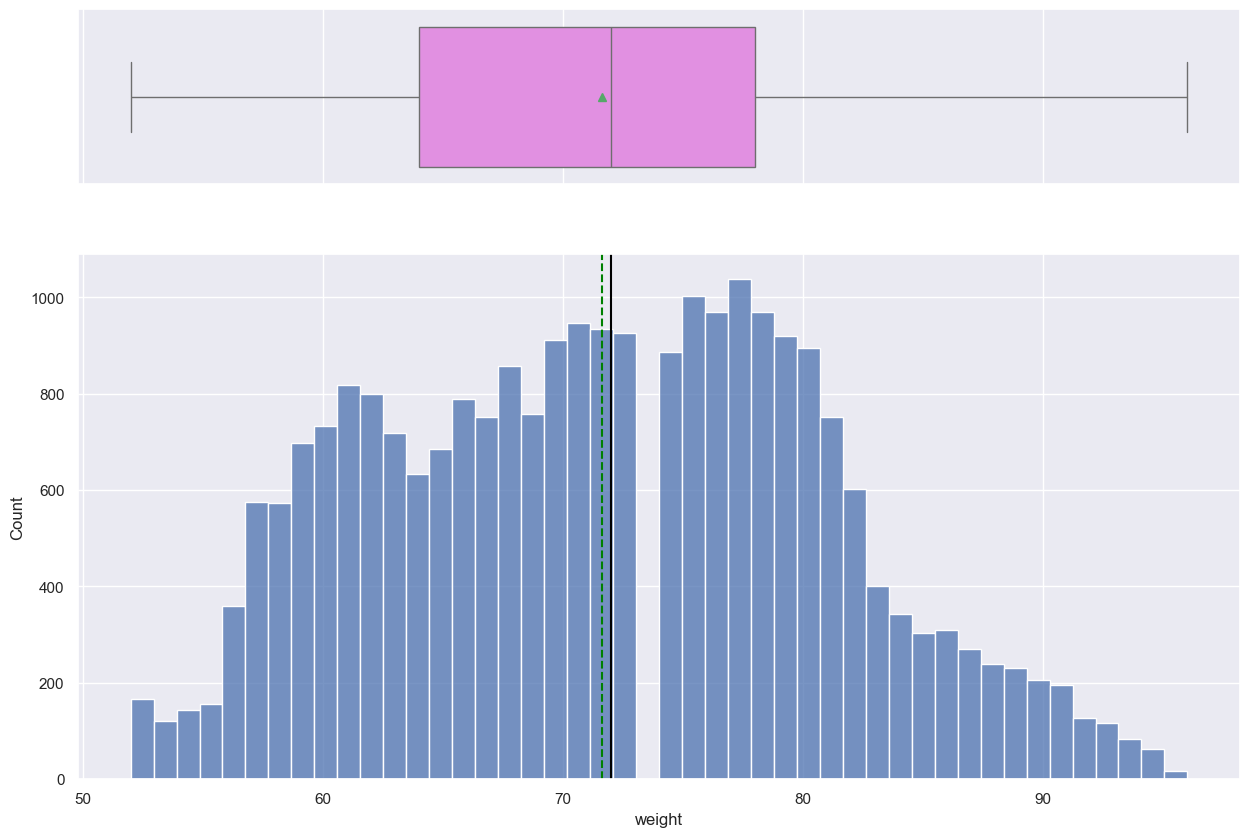

In [45]:
histogram_boxplot(df, 'weight')

* The weight distribution is slightly right skewed

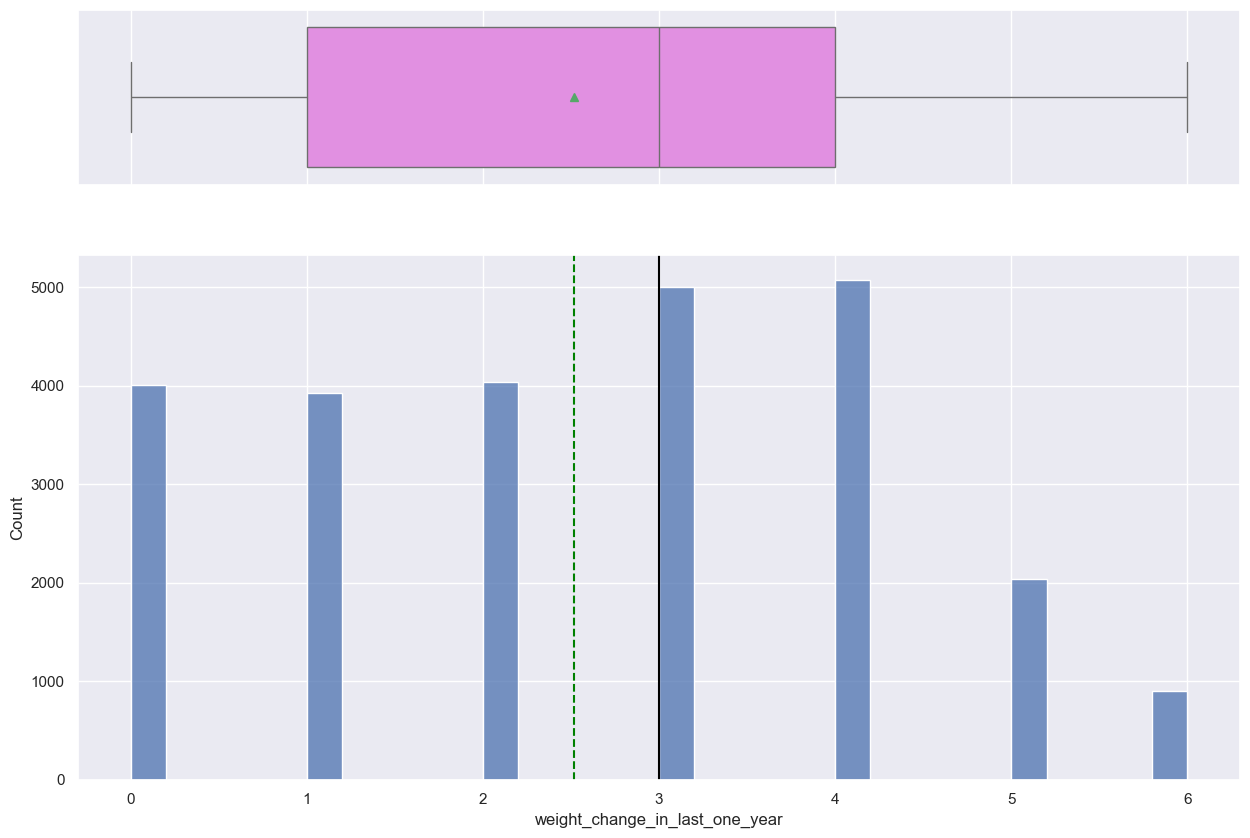

In [47]:
histogram_boxplot(df, 'weight_change_in_last_one_year')

* The average weight change is 3 

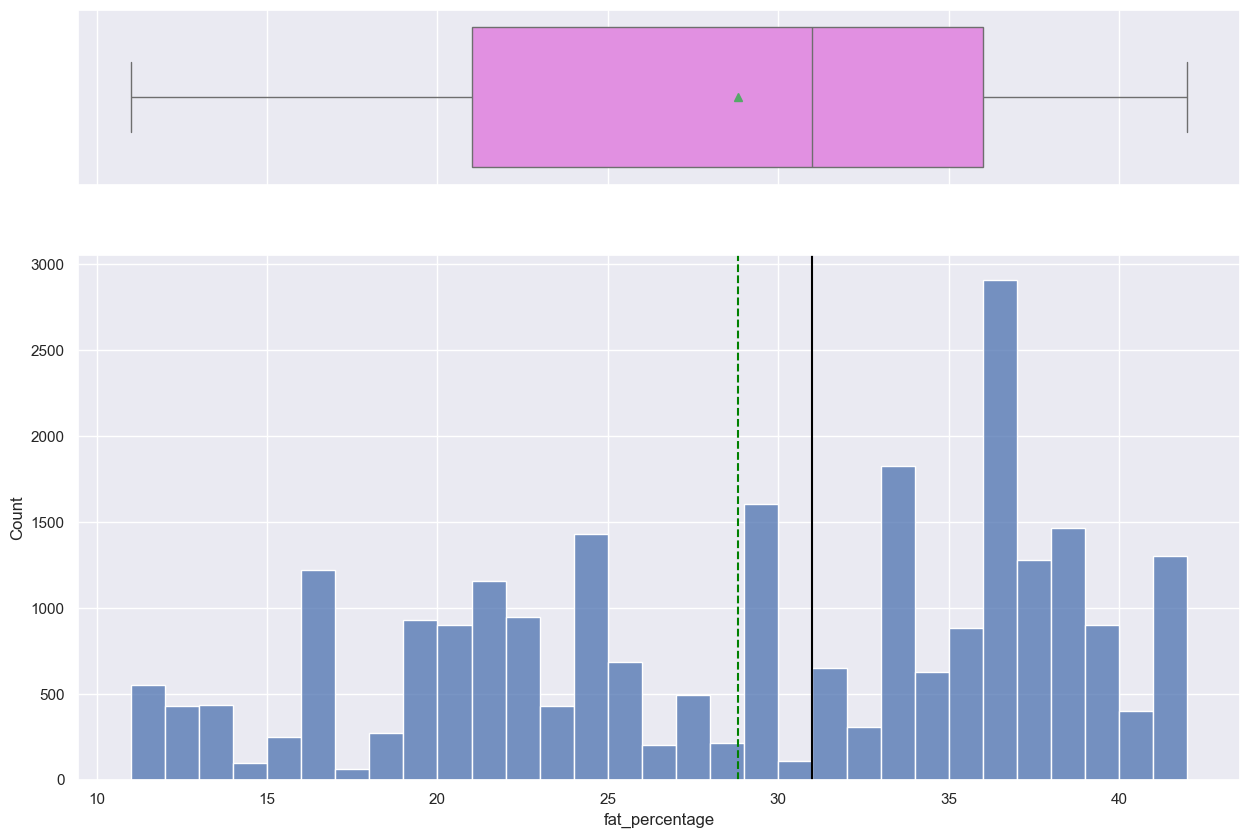

In [49]:
histogram_boxplot(df, 'fat_percentage')

* Left skewed distribution

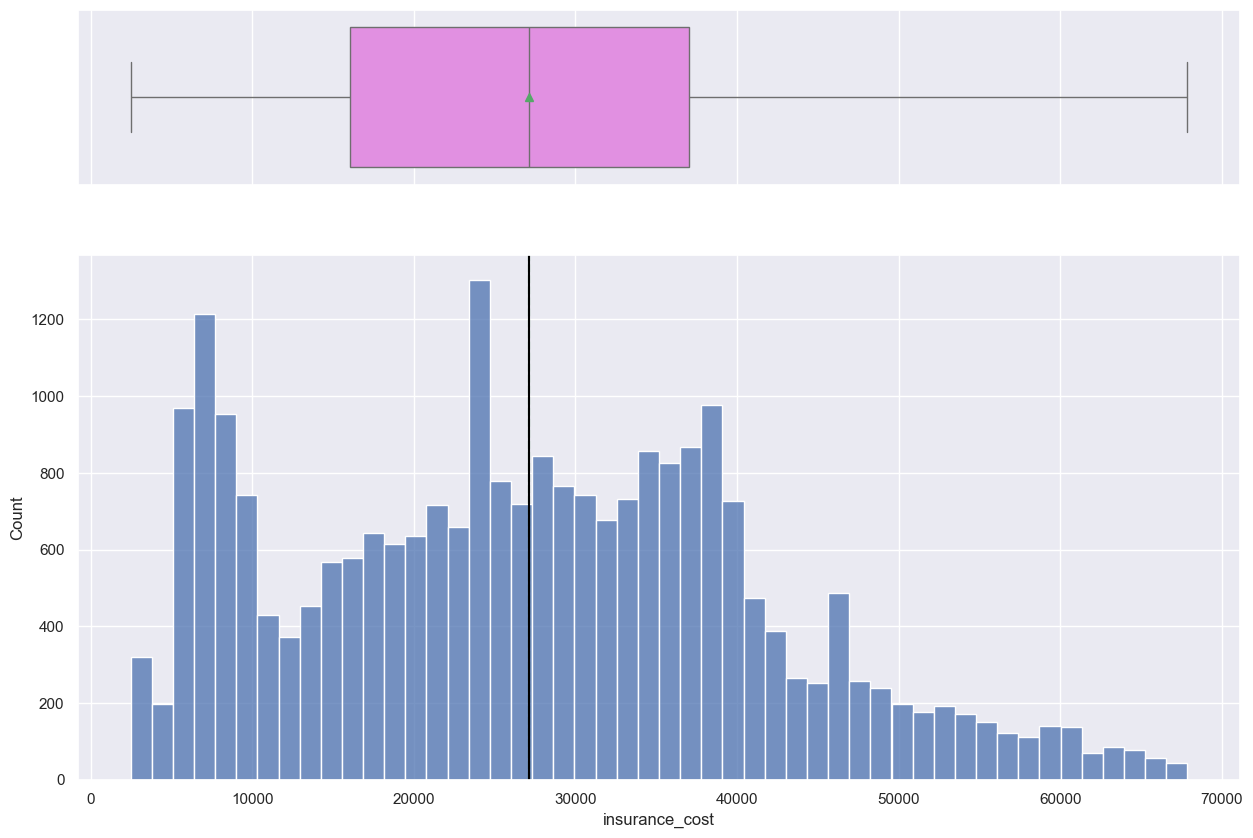

In [51]:
histogram_boxplot(df, 'insurance_cost', bins = 50)

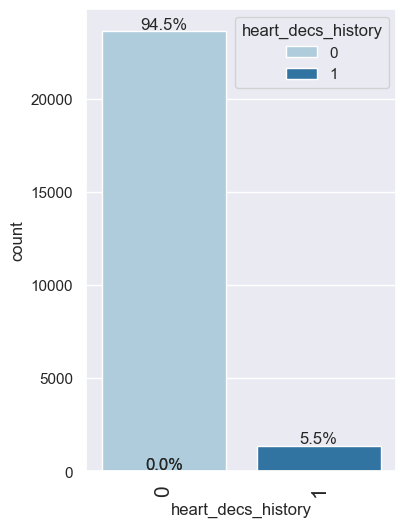

In [294]:
labeled_barplot(df, 'heart_decs_history', perc = True)

* No heart desease for most individuals

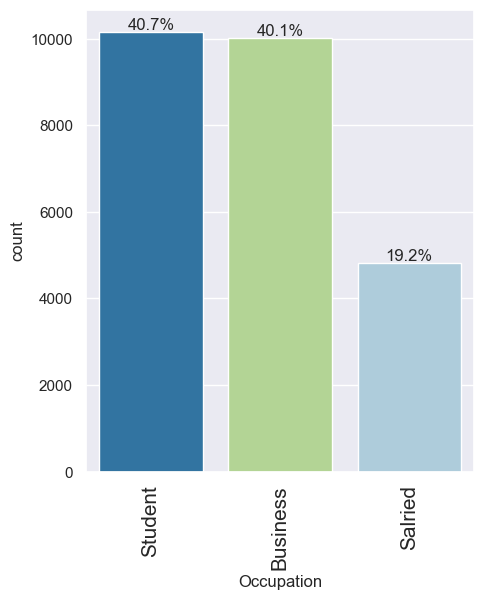

In [296]:
labeled_barplot(df, 'Occupation', perc = True)

* Students and Business people are the majority, salaried people are least

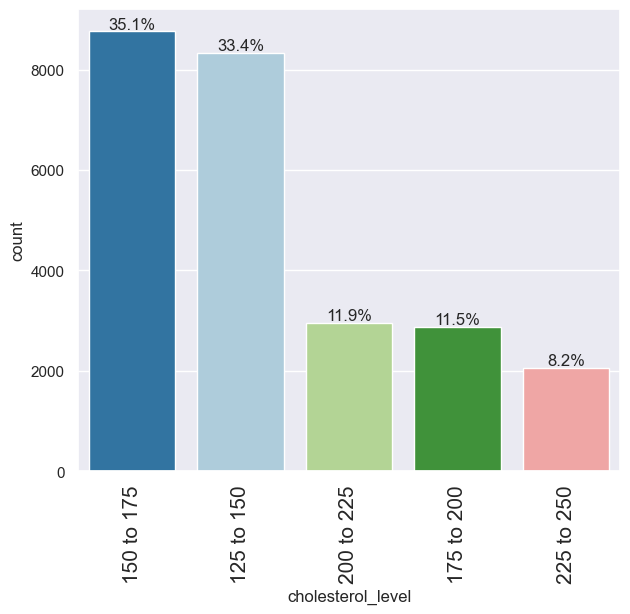

In [53]:
labeled_barplot(df, 'cholesterol_level', perc = True)

* Most of them have healthy cholesterol level

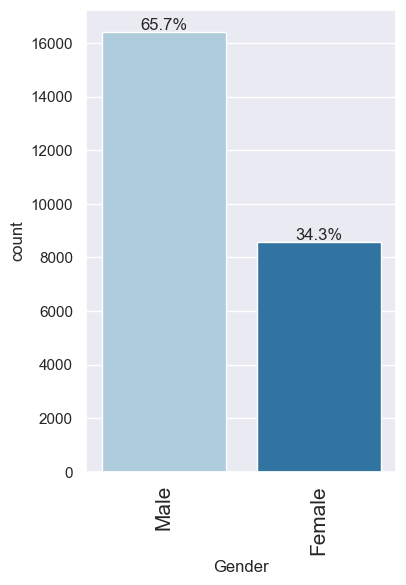

In [55]:
labeled_barplot(df, 'Gender', perc = True)

* Male category is dominant 

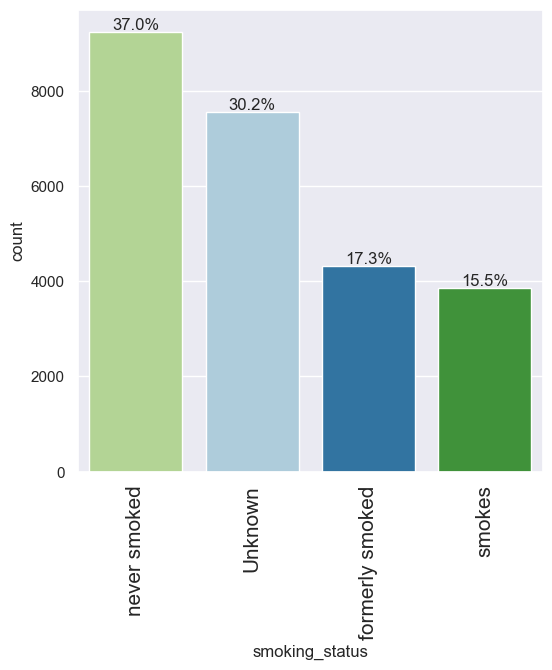

In [57]:
labeled_barplot(df, 'smoking_status', perc = True)

* Least count for those who smokes and most of them never smoked

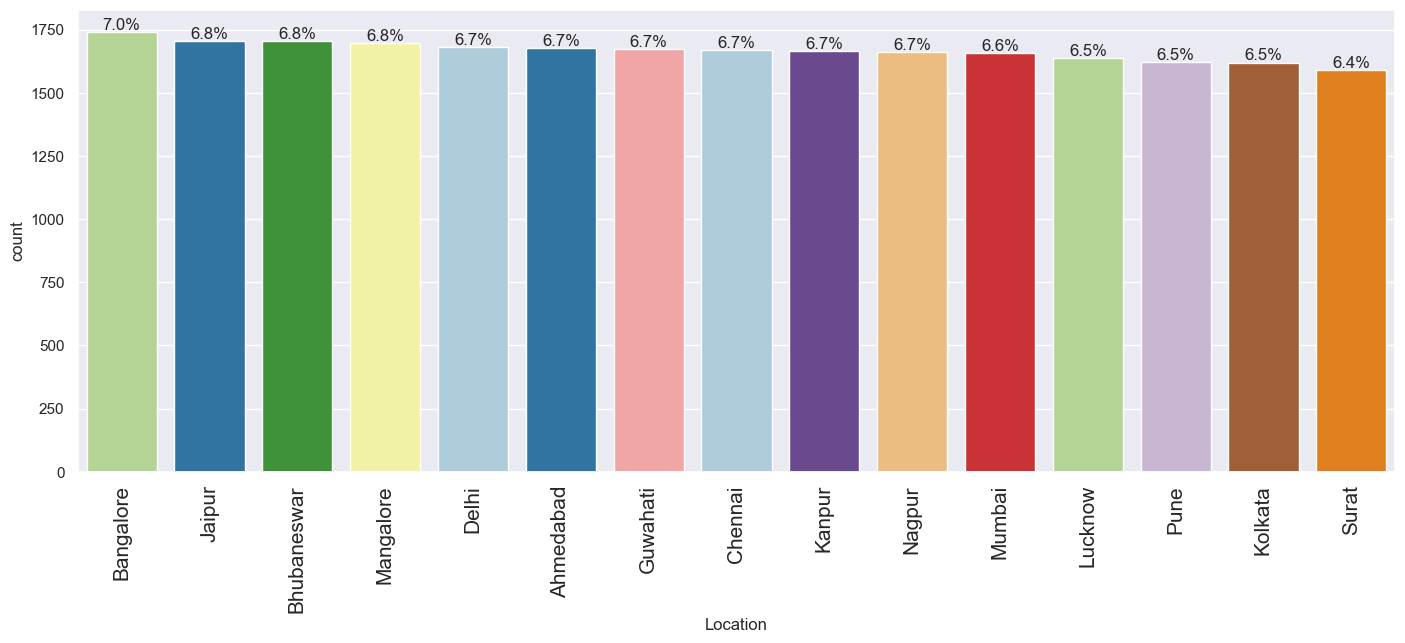

In [59]:
labeled_barplot(df, 'Location', perc = True)

* 7% are from Banglore, Least are from Surat

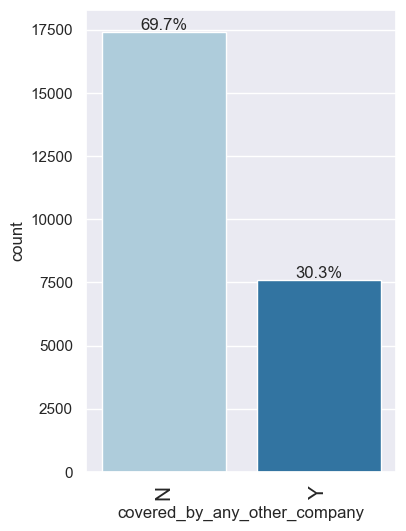

In [61]:
labeled_barplot(df, 'covered_by_any_other_company', perc = True)

* 70% of candidates does not cover any insurance from other company

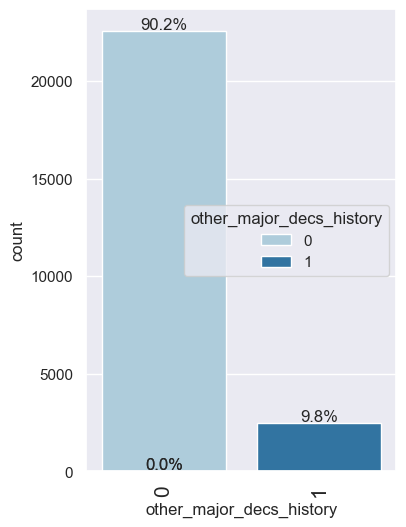

In [63]:
labeled_barplot(df, 'other_major_decs_history', perc = True)

* Most of them doesnt have any other deseases

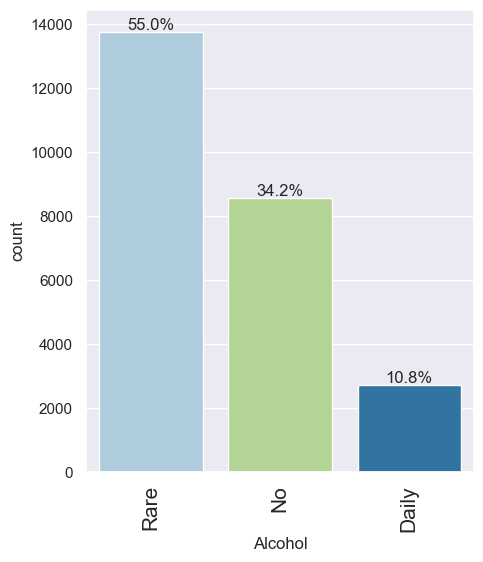

In [65]:
labeled_barplot(df, 'Alcohol', perc = True)

* 55% rareley consumed alcohol

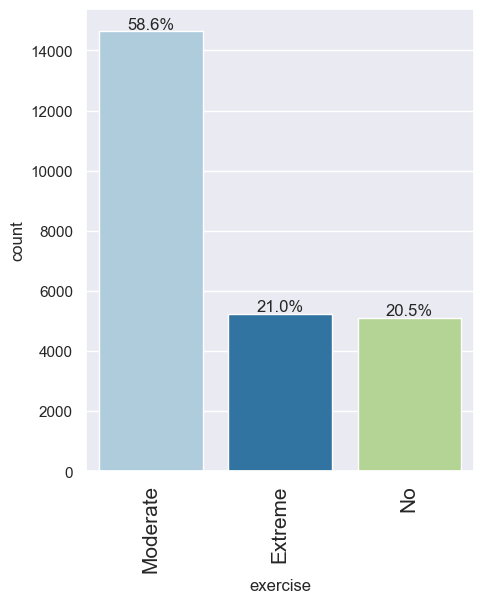

In [67]:
labeled_barplot(df, 'exercise', perc = True)

* Approx. 60% exercised moderately

In [69]:
df.insurance_cost.value_counts().sort_index()

insurance_cost
2468       12
3702      309
4936      197
6170      970
7404     1214
8638      954
9872      742
11106     431
12340     373
13574     454
14808     569
16042     578
17276     644
18510     615
19744     637
20978     717
22212     658
23446     634
24680     669
25914     779
27148     719
28382     845
29616     766
30850     743
32084     677
33318     733
34552     857
35786     827
37020     869
38254     977
39488     727
40722     474
41956     389
43190     265
44424     253
45658     233
46892     254
48126     259
49360     239
50594     199
51828     177
53062     192
54296     172
55530     152
56764     122
57998     113
59232     140
60466     137
61700      70
62934      87
64168      77
65402      56
66636      27
67870      17
Name: count, dtype: int64

In [71]:
#creating numerical columns to check correlation and droping applicant_id
num_cols = df.select_dtypes(include = np.number).columns.tolist()
num_cols.remove('applicant_id')
num_cols

['years_of_insurance_with_us',
 'regular_checkup_lasy_year',
 'adventure_sports',
 'visited_doctor_last_1_year',
 'daily_avg_steps',
 'age',
 'heart_decs_history',
 'other_major_decs_history',
 'avg_glucose_level',
 'bmi',
 'Year_last_admitted',
 'weight',
 'weight_change_in_last_one_year',
 'fat_percentage',
 'insurance_cost']

## Bivariate analysis

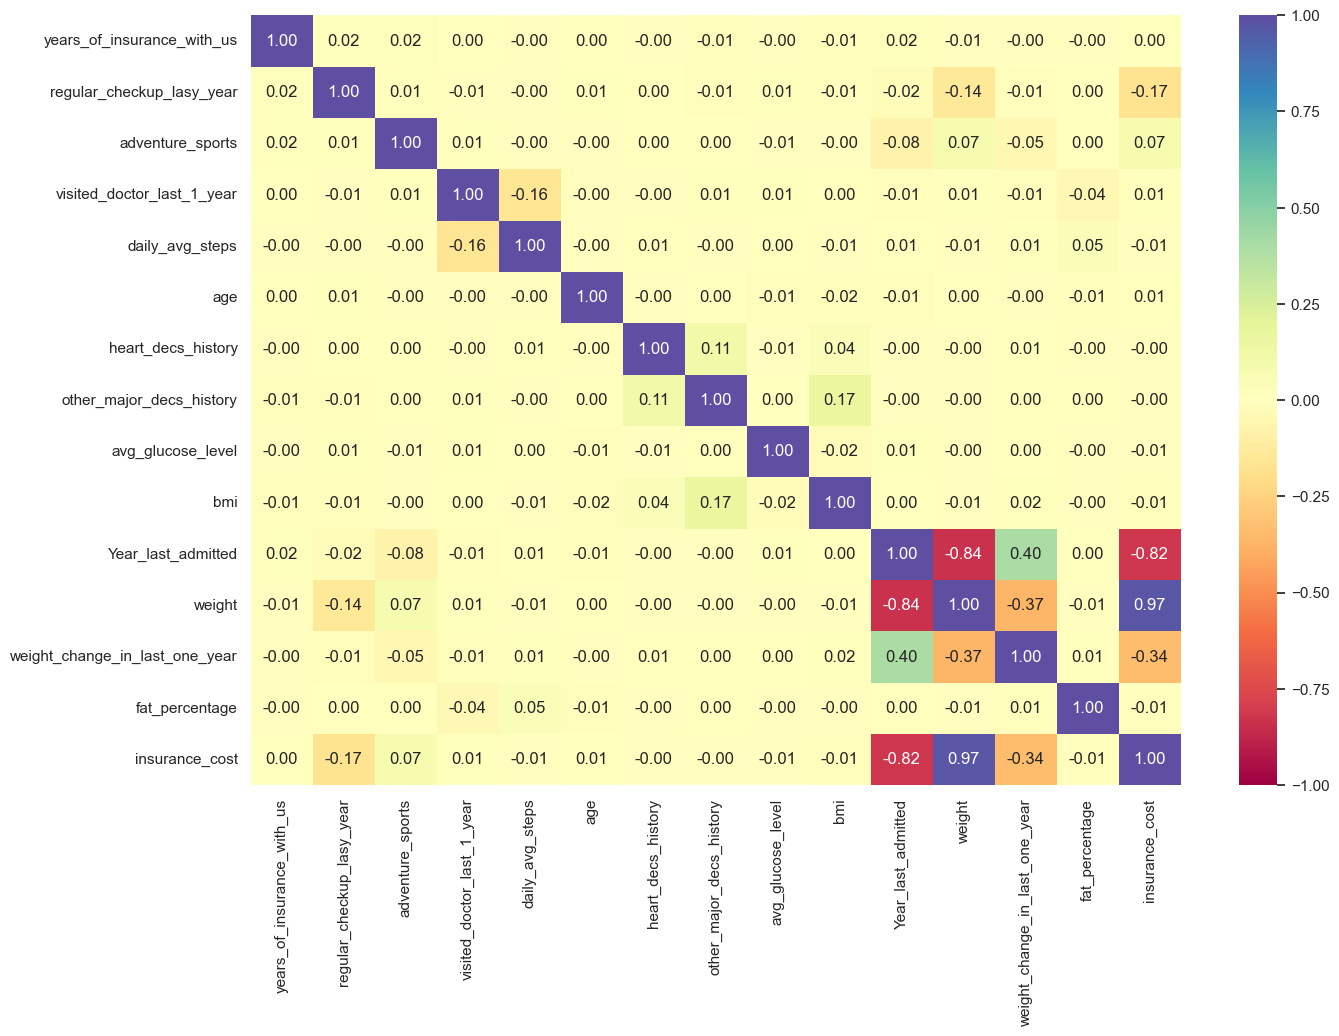

In [73]:
# correlation of num_cols
plt.figure(figsize = (15,10))
sns.heatmap(
    df[num_cols].corr(), annot = True, vmin = -1, vmax = 1, fmt = ".2f", cmap = "Spectral"
)
plt.show()

* weight and insurance cost are highly correlated(0.97)
* year_last_admitted and insurance cost are highly negative correlated, which shows that those who admitted recently doesnot covered more insurance cost
* weight change also shows negative correlation of (-0.34) with insurance cost, change in lifestyle also have some impact
* weight and regular check-up are negatively correlated (-0.14), those who maintain normal body weight tends to have low health effects , so less hospital visits
* change in weight also affects the admssion to the hospital positively(0.40)
* weight and weight change negatively related(-0.37)
* bmi and other major diseases positively related(0.17), if bmi is more, chances of disease is also high
* positive correlation with heart disease and other major disease conditions(0.11)
* daily average steps also affects negatively(-0.16) with doctor visit in last year

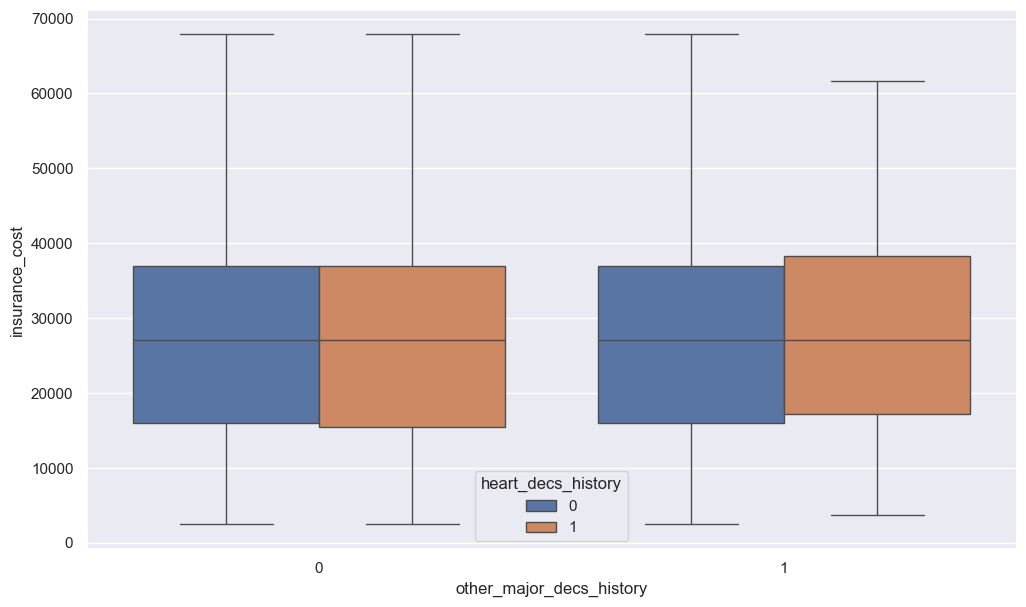

In [75]:
plt.figure(figsize =(12,7))
sns.boxplot(data = df, x = 'other_major_decs_history', y = 'insurance_cost', hue = 'heart_decs_history')
plt.show()

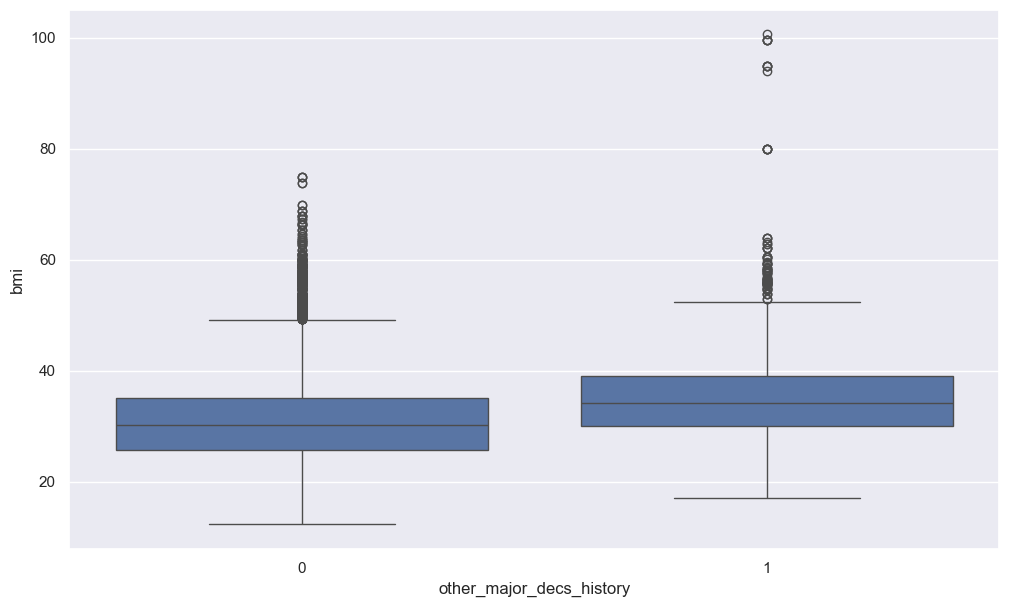

In [77]:
plt.figure(figsize =(12,7))
sns.boxplot(data = df, x = 'other_major_decs_history', y = 'bmi')
plt.show()

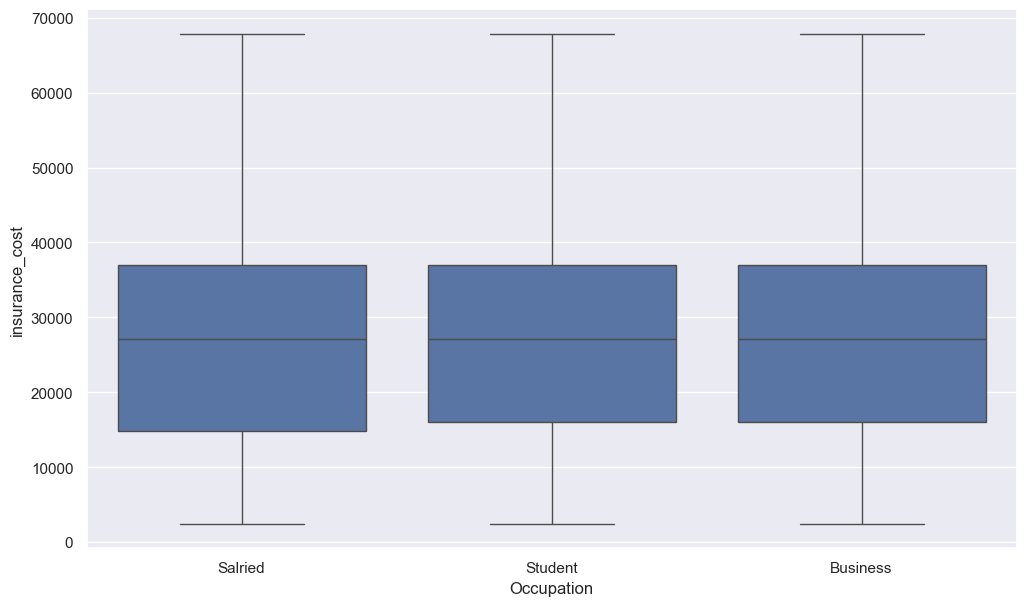

In [79]:
plt.figure(figsize =(12,7))
sns.boxplot(data = df, x = 'Occupation', y = 'insurance_cost')
plt.show()

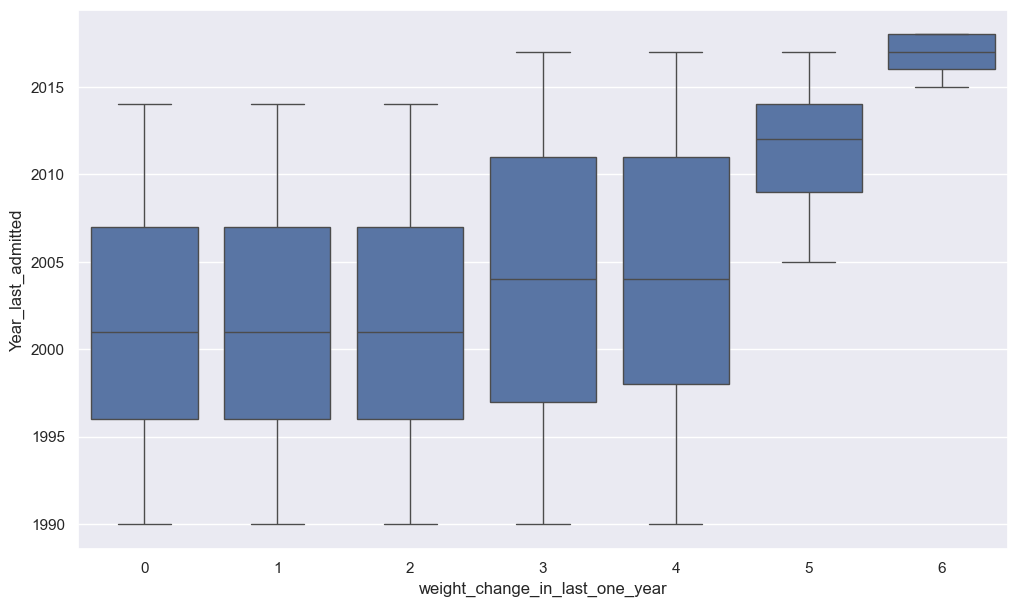

In [81]:
plt.figure(figsize =(12,7))
sns.boxplot(data = df, x = 'weight_change_in_last_one_year', y = 'Year_last_admitted')
plt.show()

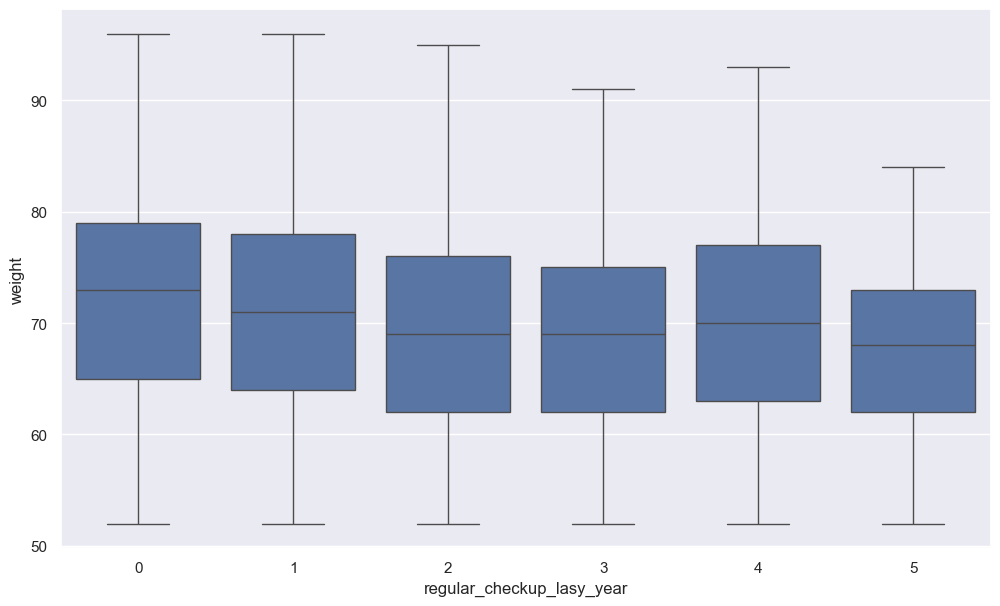

In [83]:
plt.figure(figsize =(12,7))
sns.boxplot(data = df, x = 'regular_checkup_lasy_year', y = 'weight')
plt.show()

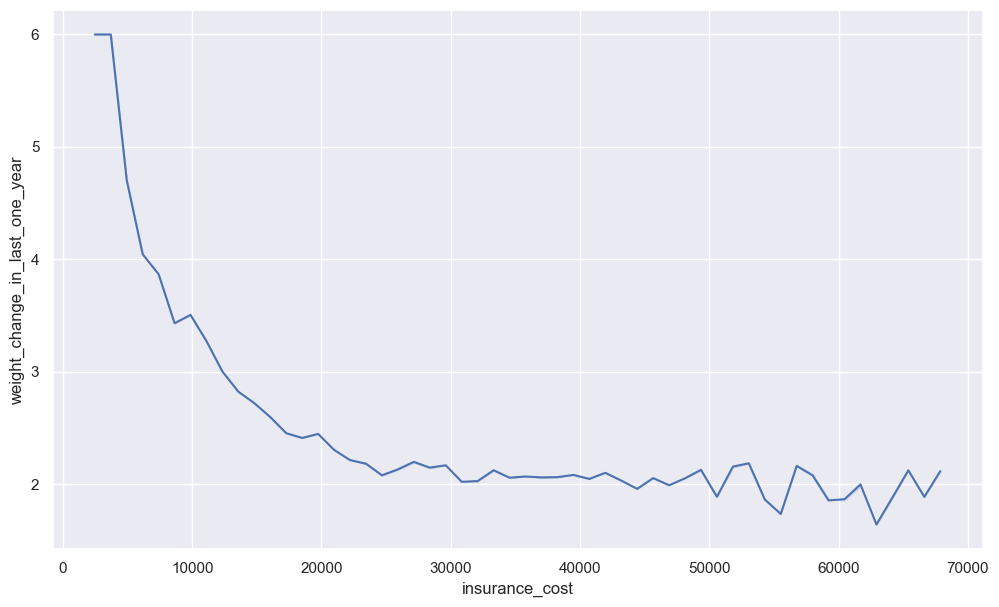

In [85]:
plt.figure(figsize =(12,7))
sns.lineplot(data = df, x = 'insurance_cost', y = 'weight_change_in_last_one_year', ci = False)
plt.show()

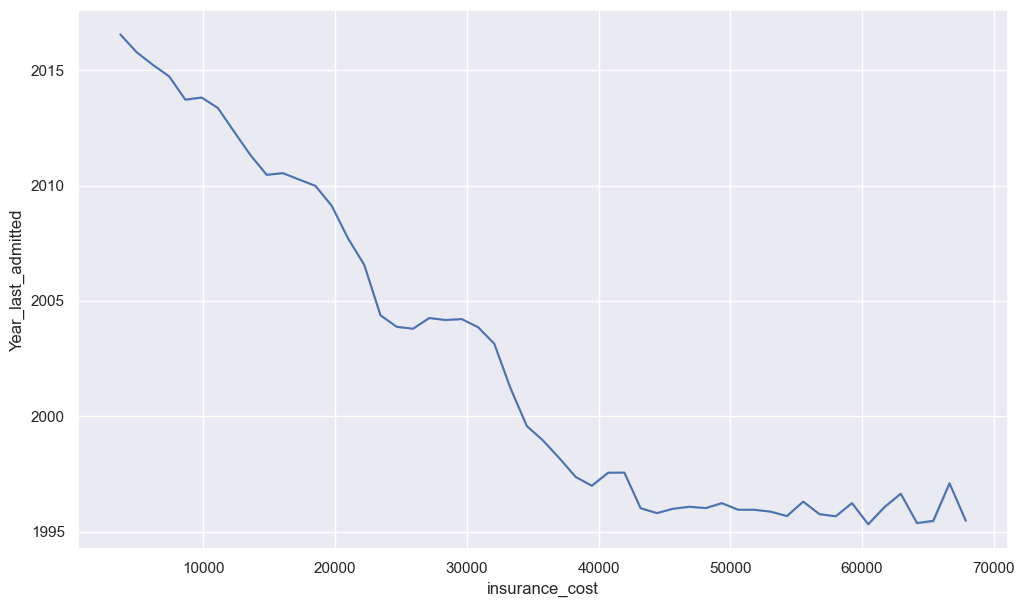

In [87]:
plt.figure(figsize =(12,7))
sns.lineplot(data = df, x = 'insurance_cost', y = 'Year_last_admitted',ci =False)
plt.show()

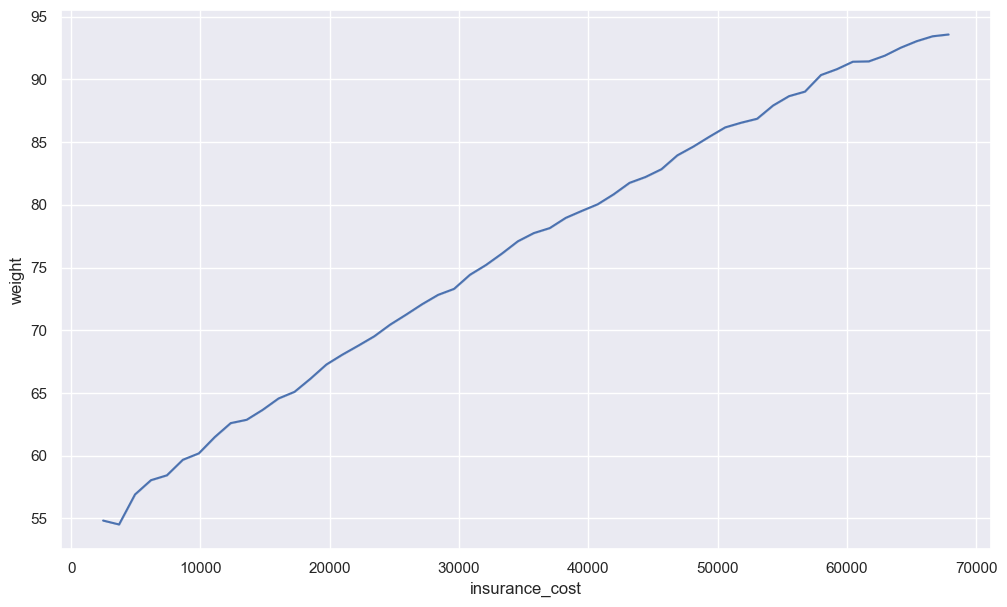

In [89]:
plt.figure(figsize =(12,7))
sns.lineplot(data = df, x = 'insurance_cost', y = 'weight', ci = False)
plt.show()

In [91]:
#creating numerical columns to check correlation and droping applicant_id
num_cols1 = df.select_dtypes(include = np.number).columns.tolist()
num_cols1.remove('applicant_id')
num_cols1

['years_of_insurance_with_us',
 'regular_checkup_lasy_year',
 'adventure_sports',
 'visited_doctor_last_1_year',
 'daily_avg_steps',
 'age',
 'heart_decs_history',
 'other_major_decs_history',
 'avg_glucose_level',
 'bmi',
 'Year_last_admitted',
 'weight',
 'weight_change_in_last_one_year',
 'fat_percentage',
 'insurance_cost']

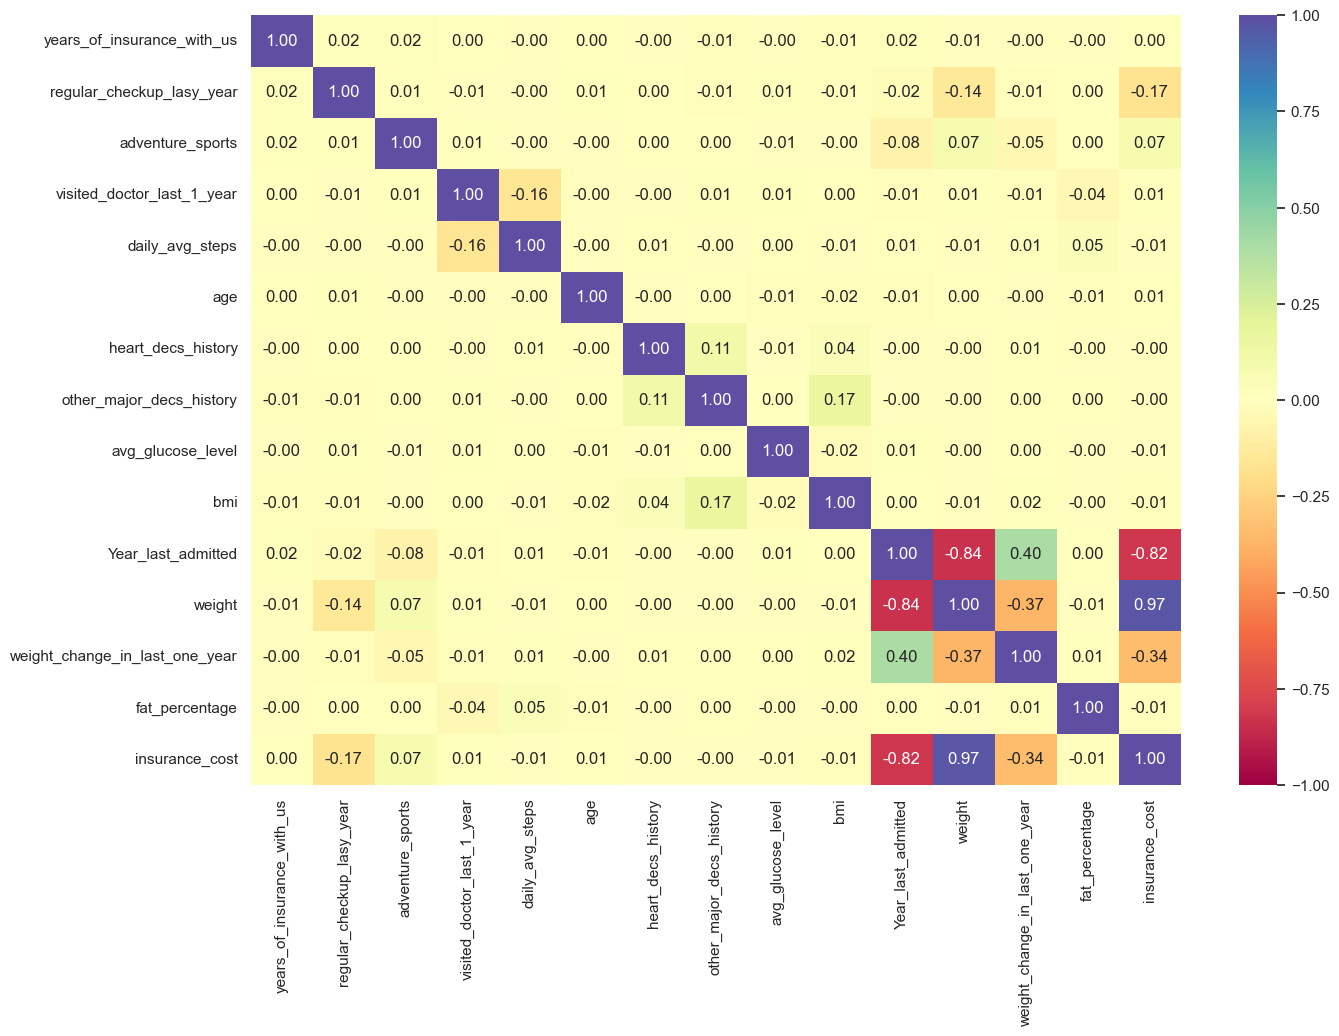

In [95]:
# correlation of num_cols
plt.figure(figsize = (15,10))
sns.heatmap(
    df[num_cols1].corr(), annot = True, vmin = -1, vmax = 1, fmt = ".2f", cmap = "Spectral"
)
plt.show()

## Data preprocessing

* Corrected spelling of the value 'Salaried' instead of 'Salried' in the column Occupation and the column name regular_checkup_lasy_year changed to regular_checkup_last_year

In [97]:
df.rename(columns={'regular_checkup_lasy_year': 'regular_checkup_last_year'}, inplace=True)

In [99]:
df['Occupation'] = df['Occupation'].replace({'Salried':'Salaried'})

In [101]:
df.cholesterol_level.value_counts()

cholesterol_level
150 to 175    8763
125 to 150    8339
200 to 225    2963
175 to 200    2881
225 to 250    2054
Name: count, dtype: int64

In [103]:
cholesterol_mapping = {
    '125 to 150': 1,
    '150 to 175': 2,
    '175 to 200': 3,
    '200 to 225': 4,
    '225 to 250': 5
}

df['cholesterol_level_encoded'] = df['cholesterol_level'].map(cholesterol_mapping)

In [105]:
df.cholesterol_level_encoded.value_counts()

cholesterol_level_encoded
2    8763
1    8339
4    2963
3    2881
5    2054
Name: count, dtype: int64

In [107]:
#dropping the cholesterol_level
df.drop('cholesterol_level', axis = 1, inplace = True)

## Missing value treatment

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   applicant_id                    25000 non-null  int64  
 1   years_of_insurance_with_us      25000 non-null  int64  
 2   regular_checkup_last_year       25000 non-null  int64  
 3   adventure_sports                25000 non-null  int64  
 4   Occupation                      25000 non-null  object 
 5   visited_doctor_last_1_year      25000 non-null  int64  
 6   daily_avg_steps                 25000 non-null  int64  
 7   age                             25000 non-null  int64  
 8   heart_decs_history              25000 non-null  int64  
 9   other_major_decs_history        25000 non-null  int64  
 10  Gender                          25000 non-null  object 
 11  avg_glucose_level               25000 non-null  int64  
 12  bmi                             

* bmi is a right-skewed data, need to be treated by imputing median values

In [125]:
df['bmi'].fillna(df['bmi'].median(), inplace = True)

In [127]:
print(df['bmi'].min())

12.3


In [129]:
df['Year_last_admitted'].fillna(df['Year_last_admitted'].median(), inplace = True)

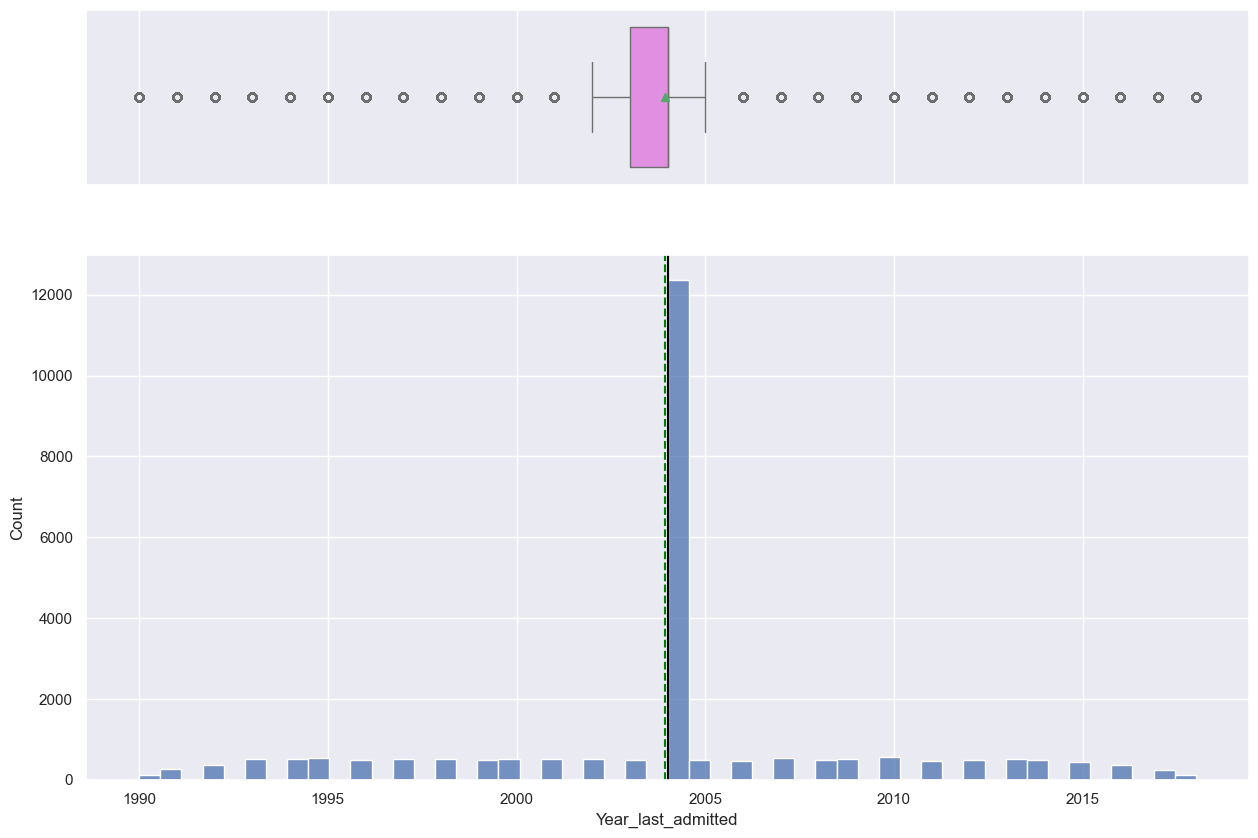

In [131]:
histogram_boxplot(df, 'Year_last_admitted', bins = 50)

## Feature engineering

In [133]:
bins = [0, 18.5, 25, 30, 35, 40, df['bmi'].max()+1]
labels = ['Underweight', 'Normal', 'Overweight', 'Obesity I', 'Obesity II', 'Obesity III']
df['bmi_category'] = pd.cut(df['bmi'], bins=bins, labels=labels, right=False)

In [135]:
df['Years_since_admission'] = 2018 - df['Year_last_admitted']
df['Years_since_admission'].fillna(99, inplace=True)

* We need to know the individual admitted hospital 1-2 years from 2018 to understand their active or recurring health conditions.
* This can influence the cost predictions or insurance coverages.
 If someone not admitted to hospital for long since 2018 indicates low insurance coverage.

In [137]:
df.Years_since_admission.isna().sum()

0

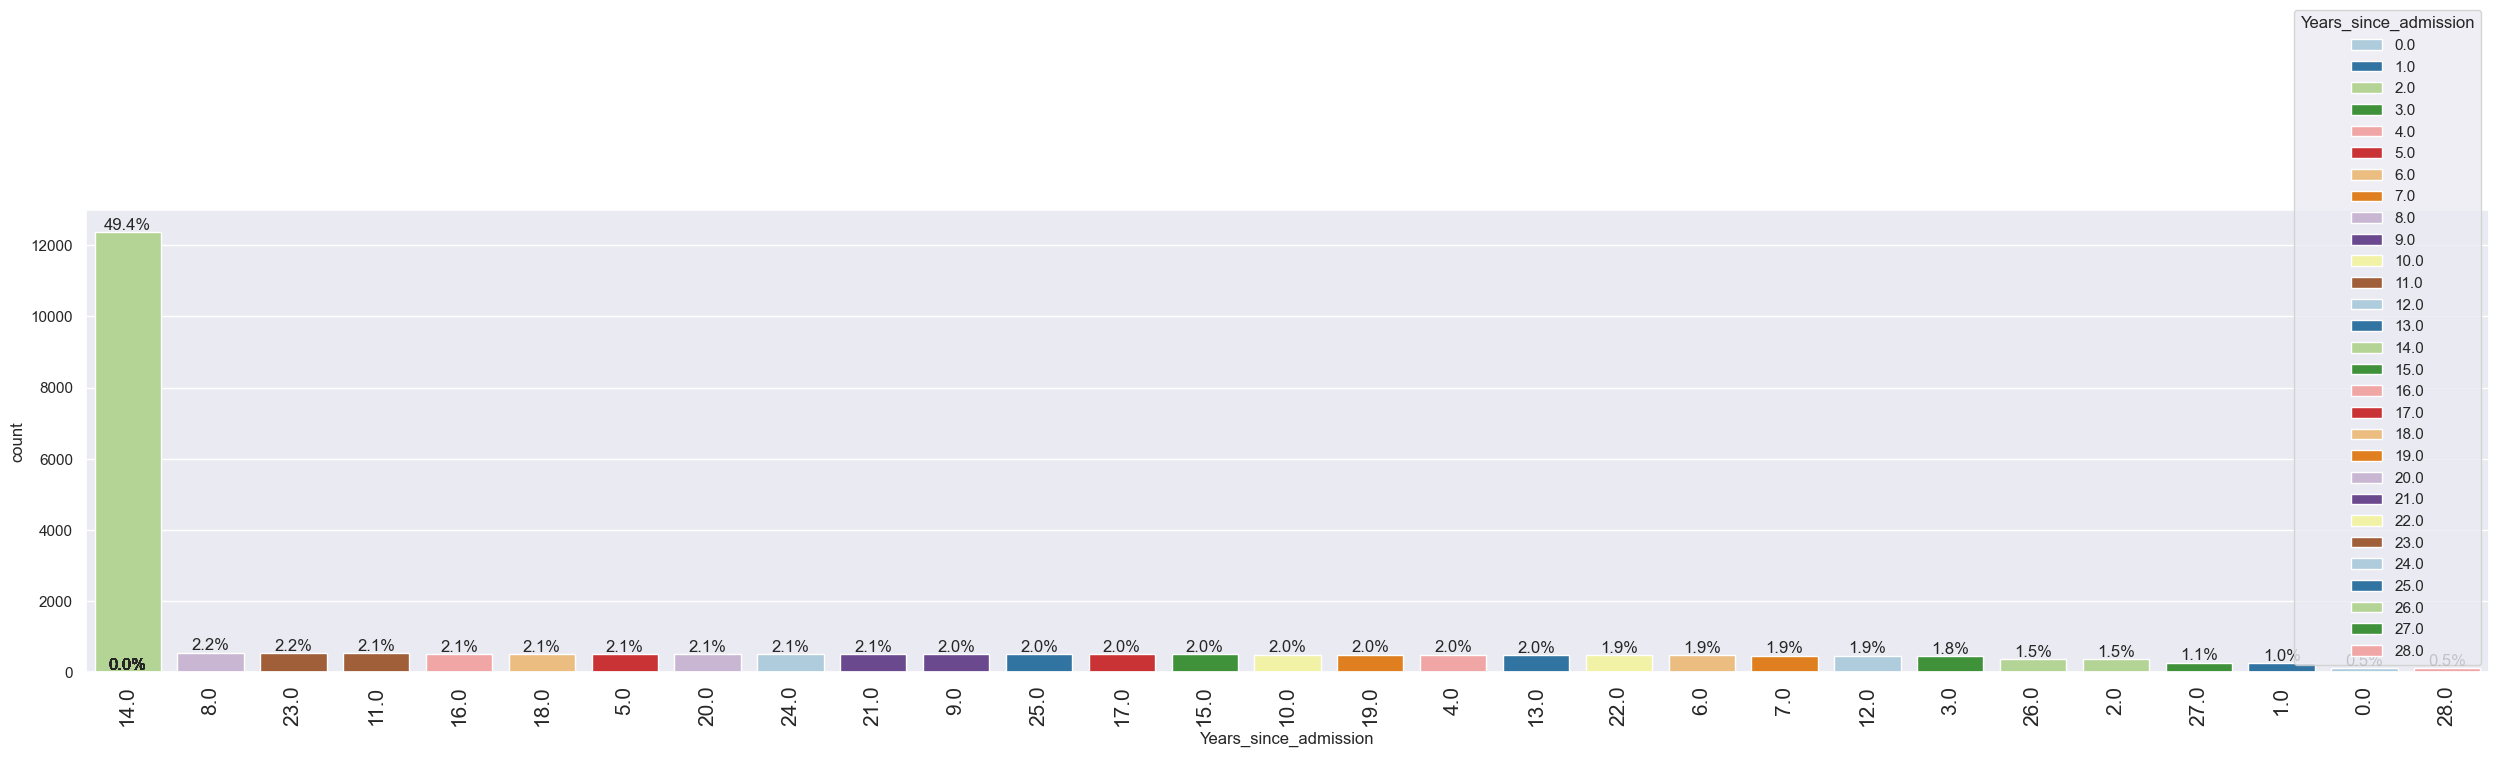

In [139]:
labeled_barplot(df, 'Years_since_admission', perc = True)

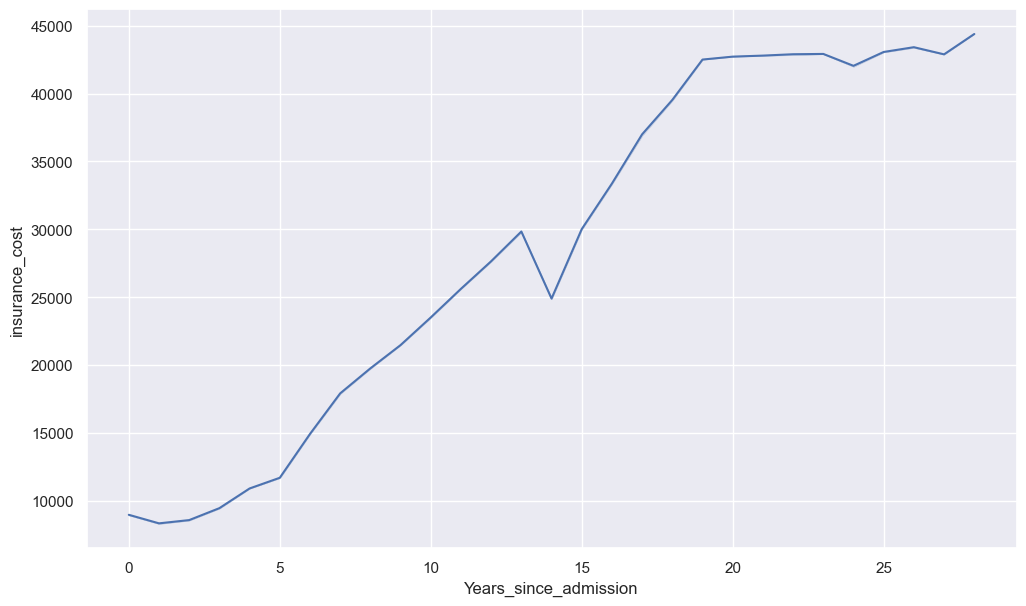

In [141]:
plt.figure(figsize =(12,7))
sns.lineplot(data = df, x = 'Years_since_admission', y = 'insurance_cost', ci = False)
plt.show()

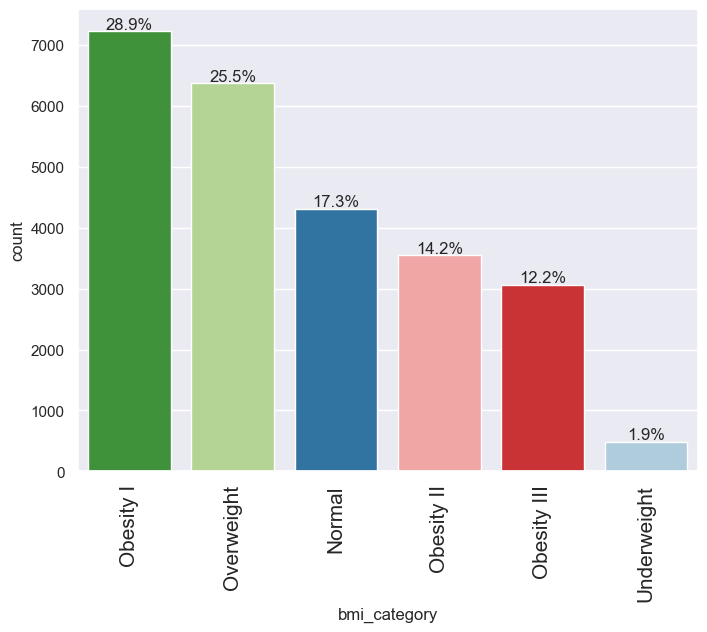

In [143]:
labeled_barplot(df, 'bmi_category', perc = True)

In [145]:
df.isnull().sum()

applicant_id                      0
years_of_insurance_with_us        0
regular_checkup_last_year         0
adventure_sports                  0
Occupation                        0
visited_doctor_last_1_year        0
daily_avg_steps                   0
age                               0
heart_decs_history                0
other_major_decs_history          0
Gender                            0
avg_glucose_level                 0
bmi                               0
smoking_status                    0
Year_last_admitted                0
Location                          0
weight                            0
covered_by_any_other_company      0
Alcohol                           0
exercise                          0
weight_change_in_last_one_year    0
fat_percentage                    0
insurance_cost                    0
cholesterol_level_encoded         0
bmi_category                      0
Years_since_admission             0
dtype: int64

In [147]:
df.insurance_cost.unique()

array([20978,  6170, 28382, 27148, 29616, 39488, 37020, 22212,  8638,
       25914, 17276, 14808, 46892, 33318, 49360, 18510, 32084, 12340,
        3702,  9872, 55530,  4936, 51828, 23446,  7404, 57998, 38254,
       24680, 60466, 54296, 34552, 16042, 30850, 41956, 13574, 43190,
       48126, 19744, 56764, 35786, 11106, 61700, 44424, 40722, 59232,
       53062, 64168, 62934, 45658, 50594, 65402, 66636, 67870,  2468],
      dtype=int64)

* All missing values are treated
* Drop the columns `applicant_id`,`bmi` and `Year_last_admitted`

In [149]:
df1 = df.copy() # copying to new dataframe to maintain original data

In [151]:
df1.drop(['applicant_id','bmi','Year_last_admitted'], axis= 1, inplace =True)

In [153]:
df1.drop(['Location'], axis= 1, inplace =True)

In [155]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   years_of_insurance_with_us      25000 non-null  int64   
 1   regular_checkup_last_year       25000 non-null  int64   
 2   adventure_sports                25000 non-null  int64   
 3   Occupation                      25000 non-null  object  
 4   visited_doctor_last_1_year      25000 non-null  int64   
 5   daily_avg_steps                 25000 non-null  int64   
 6   age                             25000 non-null  int64   
 7   heart_decs_history              25000 non-null  int64   
 8   other_major_decs_history        25000 non-null  int64   
 9   Gender                          25000 non-null  object  
 10  avg_glucose_level               25000 non-null  int64   
 11  smoking_status                  25000 non-null  object  
 12  weight            

In [157]:
df1.insurance_cost.unique()

array([20978,  6170, 28382, 27148, 29616, 39488, 37020, 22212,  8638,
       25914, 17276, 14808, 46892, 33318, 49360, 18510, 32084, 12340,
        3702,  9872, 55530,  4936, 51828, 23446,  7404, 57998, 38254,
       24680, 60466, 54296, 34552, 16042, 30850, 41956, 13574, 43190,
       48126, 19744, 56764, 35786, 11106, 61700, 44424, 40722, 59232,
       53062, 64168, 62934, 45658, 50594, 65402, 66636, 67870,  2468],
      dtype=int64)

## Outlier detection and treatment

ValueError: num must be an integer with 1 <= num <= 9, not 10

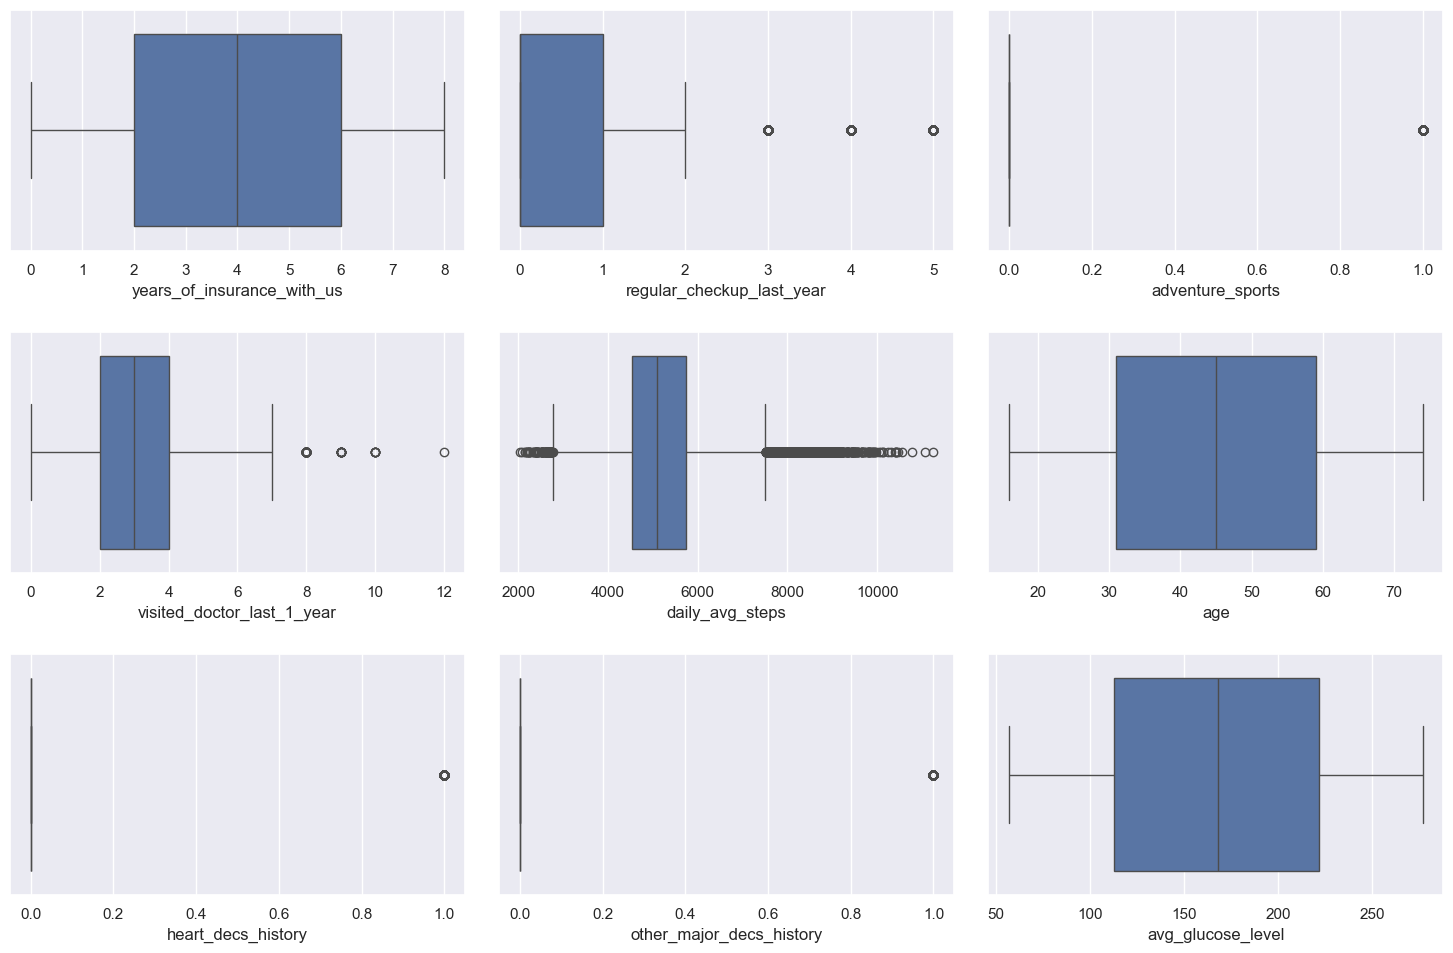

In [159]:
# outlier detection using box plots
num_cols = df1.select_dtypes(include = np.number).columns.tolist()

plt.figure(figsize= (15,10))

for i, variable in enumerate(num_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=df1, x=variable)
    plt.tight_layout(pad=2)

plt.show()

* The dataset have many outliers

In [161]:
#copying to df_lr to avoid the missing of original data
df_lr = df1.copy()

In [163]:
# functions to treat outliers by flooring and capping


def treat_outliers(df_lr, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df_lr[col].quantile(0.25)  # 25th quantile
    Q3 = df_lr[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df_lr[col] = np.clip(df_lr[col], Lower_Whisker, Upper_Whisker)

    return df_lr


def treat_outliers_all(df_lr, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df_lr = treat_outliers(df_lr, c)

    return df_lr

In [165]:
num_col = df_lr.select_dtypes(include=np.number).columns.tolist()
df_lr = treat_outliers_all(df_lr, num_col)

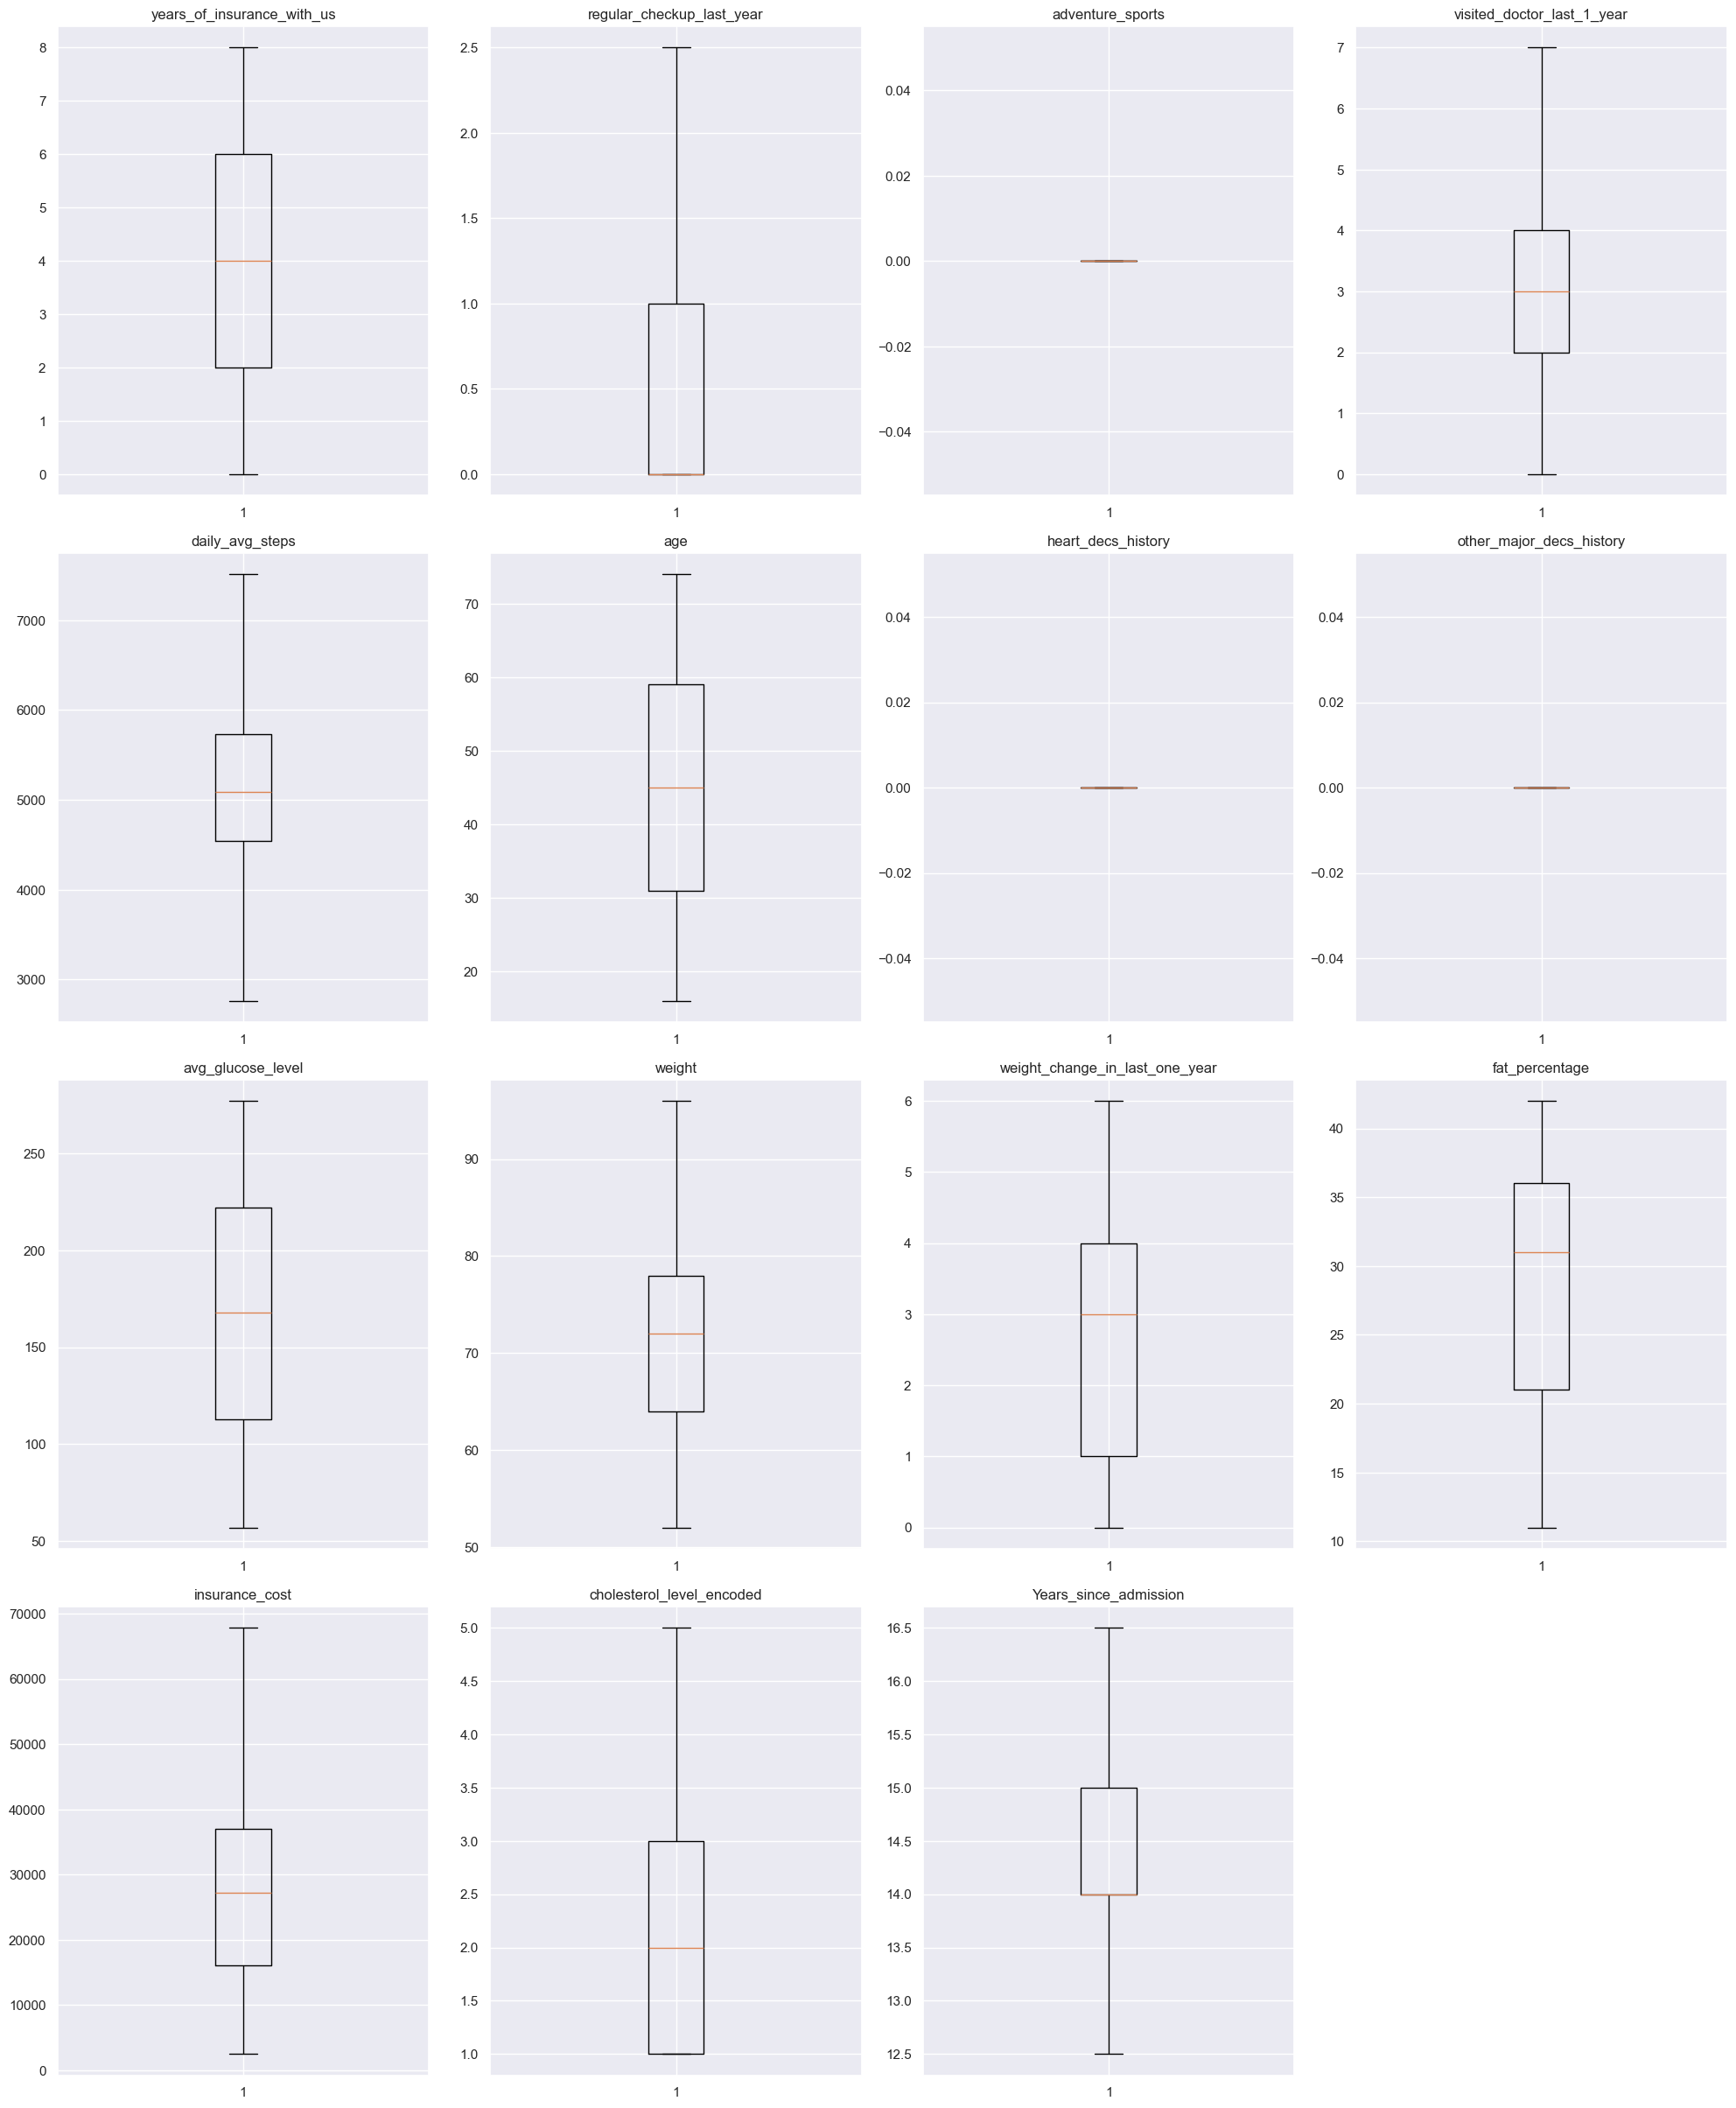

In [167]:
# Let's look at box plot to see if outliers have been treated or not
plt.figure(figsize =(20,30))

for i, variable in enumerate(num_col):
    plt.subplot(5,4,i+1)
    plt.boxplot(df_lr[variable],whis = 1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* Outliers are treated

## Data preparation for modeling

* Encode the categorical features
* Insurance_cost is the target variable
* Splitting the data into train and test
* Need to build an linear regression model and performance need to be checked

In [169]:
# Defining X and y 
X = df_lr.drop(['insurance_cost'], axis = 1)
y = df_lr['insurance_cost']

print (X.head())
print(y.head())

   years_of_insurance_with_us  regular_checkup_last_year  adventure_sports  \
0                           3                        1.0                 0   
1                           0                        0.0                 0   
2                           1                        0.0                 0   
3                           7                        2.5                 0   
4                           3                        1.0                 0   

  Occupation  visited_doctor_last_1_year  daily_avg_steps  age  \
0   Salaried                           2           4866.0   28   
1    Student                           4           6411.0   50   
2   Business                           4           4509.0   68   
3   Business                           2           6214.0   51   
4    Student                           2           4938.0   44   

   heart_decs_history  other_major_decs_history  Gender  ...   smoking_status  \
0                   0                         0    Ma

In [171]:
#Add the intercept to data
X = sm.add_constant(X)

In [173]:
#Creating dummy variables
X = pd.get_dummies(
    X, columns = X.select_dtypes(
        include = ['object','category']).columns.tolist(), drop_first = True
)
X.head()

const  years_of_insurance_with_us  regular_checkup_last_year  \
0    1.0                           3                        1.0   
1    1.0                           0                        0.0   
2    1.0                           1                        0.0   
3    1.0                           7                        2.5   
4    1.0                           3                        1.0   

   adventure_sports  visited_doctor_last_1_year  daily_avg_steps  age  \
0                 0                           2           4866.0   28   
1                 0                           4           6411.0   50   
2                 0                           4           4509.0   68   
3                 0                           2           6214.0   51   
4                 0                           2           4938.0   44   

   heart_decs_history  other_major_decs_history  avg_glucose_level  ...  \
0                   0                         0                 97  ...   
1                   0                         0                212  ...   
2                   0                         0                166  ...   
3                   0                         0                109  ...   
4                   0                         0                118  ...   

   covered_by_any_other_company_Y  Alcohol_No  Alcohol_Rare  \
0                           False       False          True   
1                           False       False          True   
2                           False       False         False   
3                            True       False          True   
4                           False        True         False   

   exercise_Moderate  exercise_No  bmi_category_Normal  \
0               True        False                False   
1               True        False                False   
2              False        False                False   
3              False         True                 True   
4              False        False                False   

   bmi_category_Overweight  bmi_category_Obesity I  bmi_category_Obesity II  \
0                    False                    True                    False   
1                    False                    True                    False   
2                    False                   False                    False   
3                    False                   False                    False   
4                     True                   False                    False   

   bmi_category_Obesity III  
0                     False  
1                     False  
2                      True  
3                     False  
4                     False  

[5 rows x 31 columns]

In [175]:
#Converting the input attributes into float type for modeling
X = X.astype(float)
X.head()

const  years_of_insurance_with_us  regular_checkup_last_year  \
0    1.0                         3.0                        1.0   
1    1.0                         0.0                        0.0   
2    1.0                         1.0                        0.0   
3    1.0                         7.0                        2.5   
4    1.0                         3.0                        1.0   

   adventure_sports  visited_doctor_last_1_year  daily_avg_steps   age  \
0               0.0                         2.0           4866.0  28.0   
1               0.0                         4.0           6411.0  50.0   
2               0.0                         4.0           4509.0  68.0   
3               0.0                         2.0           6214.0  51.0   
4               0.0                         2.0           4938.0  44.0   

   heart_decs_history  other_major_decs_history  avg_glucose_level  ...  \
0                 0.0                       0.0               97.0  ...   
1                 0.0                       0.0              212.0  ...   
2                 0.0                       0.0              166.0  ...   
3                 0.0                       0.0              109.0  ...   
4                 0.0                       0.0              118.0  ...   

   covered_by_any_other_company_Y  Alcohol_No  Alcohol_Rare  \
0                             0.0         0.0           1.0   
1                             0.0         0.0           1.0   
2                             0.0         0.0           0.0   
3                             1.0         0.0           1.0   
4                             0.0         1.0           0.0   

   exercise_Moderate  exercise_No  bmi_category_Normal  \
0                1.0          0.0                  0.0   
1                1.0          0.0                  0.0   
2                0.0          0.0                  0.0   
3                0.0          1.0                  1.0   
4                0.0          0.0                  0.0   

   bmi_category_Overweight  bmi_category_Obesity I  bmi_category_Obesity II  \
0                      0.0                     1.0                      0.0   
1                      0.0                     1.0                      0.0   
2                      0.0                     0.0                      0.0   
3                      0.0                     0.0                      0.0   
4                      1.0                     0.0                      0.0   

   bmi_category_Obesity III  
0                       0.0  
1                       0.0  
2                       1.0  
3                       0.0  
4                       0.0  

[5 rows x 31 columns]

In [177]:
#Splitting the data into 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state =1
)
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in train data =", y_test.shape[0])

Number of rows in train data = 17500
Number of rows in train data = 7500


## Model Building - Linear regression

In [179]:
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:         insurance_cost   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 1.118e+04
Date:                Sat, 28 Jun 2025   Prob (F-statistic):               0.00
Time:                        20:57:12   Log-Likelihood:            -1.6693e+05
No. Observations:               17500   AIC:                         3.339e+05
Df Residuals:                   17472   BIC:                         3.341e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

## Model performance check

* We will be using metric functions defined in sklearn for RMSE, MAE, and R-squared
* We will define a function to calculate MAPE and adjusted R-squared.
  The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average absolute percent error for each predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0.
* We will create a function which will print out all the above metrics in one go

In [181]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [183]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, x_train, y_train)
olsmodel_train_perf

Training Performance



RMSE        MAE  R-squared  Adj. R-squared      MAPE
0  3361.429138  2700.7052   0.945276        0.945179  15.13952

In [185]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, x_test, y_test)
olsmodel_test_perf

Test Performance



RMSE          MAE  R-squared  Adj. R-squared       MAPE
0  3322.303772  2690.187342   0.945379        0.945152  14.923196

* Model is well-fitted and generalizing well to unseen data.
* Values shows that there is no signs of overfitting or underfitting.
* Seems like features are strong, and target modeling is effective.

### Checking for Linear regression assumptions

* We will be checking the following Linear Regression assumptions:

1. No Multicollinearity
2. Linearity of variables
3. Independence of error terms
4. Normality of error terms
5. No Heteroscedasticity

In [187]:
# Let's define functions to check VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor


def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [189]:
checking_vif(x_train)

feature         VIF
0                            const  277.200557
1       years_of_insurance_with_us    1.084652
2        regular_checkup_last_year    1.031342
3                 adventure_sports         NaN
4       visited_doctor_last_1_year    1.038667
5                  daily_avg_steps    1.061165
6                              age    1.000899
7               heart_decs_history         NaN
8         other_major_decs_history         NaN
9                avg_glucose_level    1.001896
10                          weight    1.754490
11  weight_change_in_last_one_year    1.172145
12                  fat_percentage    1.104885
13       cholesterol_level_encoded    1.431172
14           Years_since_admission    1.559064
15             Occupation_Salaried    1.324811
16              Occupation_Student    1.658478
17                     Gender_Male    1.301879
18  smoking_status_formerly smoked    1.478197
19     smoking_status_never smoked    1.587139
20           smoking_status_smokes    1.416420
21  covered_by_any_other_company_Y    1.082248
22                      Alcohol_No    2.766150
23                    Alcohol_Rare    2.764576
24               exercise_Moderate    1.587139
25                     exercise_No    1.598475
26             bmi_category_Normal    8.299270
27         bmi_category_Overweight   11.144043
28          bmi_category_Obesity I   12.167261
29         bmi_category_Obesity II    7.656289
30        bmi_category_Obesity III    6.843999

* There are multiple columns with very high VIF values, indicating presence of strong multicollinearity
* We will systematically drop numerical columns with VIF > 5
* We will ignore the VIF values for dummy variables and the constant (intercept)

### Removing Multicollinearity

Steps to remove multicollinearity

1. Drop every column one by one that has a VIF score greater than 5.
2. Look at the adjusted R-squared and RMSE of all these models.
3. Drop the variable that makes the least change in adjusted R-squared.
4. Check the VIF scores again.
5. Continue till you get all VIF scores under 5.

Let's define a function that will help us do this.

In [197]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [199]:
col_list = ["bmi_category_Normal", 
            "bmi_category_Overweight",
           "bmi_category_Obesity I",
           "bmi_category_Obesity II",
           "bmi_category_Obesity III"]

res = treating_multicollinearity(x_train, y_train, col_list)
res

col  Adj. R-squared after_dropping col  \
0  bmi_category_Obesity III                           0.945195   
1       bmi_category_Normal                           0.945194   
2   bmi_category_Overweight                           0.945193   
3    bmi_category_Obesity I                           0.945187   
4   bmi_category_Obesity II                           0.945184   

   RMSE after dropping col  
0              3364.029677  
1              3364.053209  
2              3364.084197  
3              3364.274914  
4              3364.341495

* Dropping _bmi_category_Obesity III_ would have the maximum impact on the predictive power of the model (amongst the variables being considered).
* We'll drop _bmi_category_Obesity II_ and check the VIF again.

In [207]:
col_to_drop = "bmi_category_Obesity II"
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  bmi_category_Obesity II


feature         VIF
0                            const  232.820425
1       years_of_insurance_with_us    1.084640
2        regular_checkup_last_year    1.031289
3                 adventure_sports         NaN
4       visited_doctor_last_1_year    1.038613
5                  daily_avg_steps    1.060651
6                              age    1.000857
7               heart_decs_history         NaN
8         other_major_decs_history         NaN
9                avg_glucose_level    1.001559
10                          weight    1.754267
11  weight_change_in_last_one_year    1.172005
12                  fat_percentage    1.104855
13       cholesterol_level_encoded    1.431071
14           Years_since_admission    1.559043
15             Occupation_Salaried    1.324796
16              Occupation_Student    1.658356
17                     Gender_Male    1.261003
18  smoking_status_formerly smoked    1.457219
19     smoking_status_never smoked    1.551807
20           smoking_status_smokes    1.394689
21  covered_by_any_other_company_Y    1.082053
22                      Alcohol_No    2.765984
23                    Alcohol_Rare    2.764162
24               exercise_Moderate    1.586693
25                     exercise_No    1.598312
26             bmi_category_Normal    1.548796
27         bmi_category_Overweight    1.427128
28          bmi_category_Obesity I    1.442443

* We have dealt with multicollinearity in the data
* Let's rebuild the model using the updated set of predictors variables

In [209]:
olsmod1 = sm.OLS(y_train, x_train2).fit()
print(olsmod1.summary())

                            OLS Regression Results                            
Dep. Variable:         insurance_cost   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 1.207e+04
Date:                Sat, 28 Jun 2025   Prob (F-statistic):               0.00
Time:                        21:00:25   Log-Likelihood:            -1.6694e+05
No. Observations:               17500   AIC:                         3.339e+05
Df Residuals:                   17474   BIC:                         3.341e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [211]:
# Lets drop bmi_category_Obesity I
col_to_drop = "bmi_category_Obesity I"

# Use x_train2 and x_test2 for column references
x_train3 = x_train2.loc[:, ~x_train2.columns.str.startswith(col_to_drop)]
x_test3 = x_test2.loc[:, ~x_test2.columns.str.startswith(col_to_drop)]

# Check VIF
vif = checking_vif(x_train3)
print("VIF after dropping", col_to_drop)
vif

VIF after dropping bmi_category_Obesity I


feature         VIF
0                            const  230.851276
1       years_of_insurance_with_us    1.084603
2        regular_checkup_last_year    1.031280
3                 adventure_sports         NaN
4       visited_doctor_last_1_year    1.038607
5                  daily_avg_steps    1.060644
6                              age    1.000852
7               heart_decs_history         NaN
8         other_major_decs_history         NaN
9                avg_glucose_level    1.001525
10                          weight    1.754104
11  weight_change_in_last_one_year    1.171997
12                  fat_percentage    1.104823
13       cholesterol_level_encoded    1.431061
14           Years_since_admission    1.559040
15             Occupation_Salaried    1.324738
16              Occupation_Student    1.658345
17                     Gender_Male    1.260807
18  smoking_status_formerly smoked    1.456667
19     smoking_status_never smoked    1.551771
20           smoking_status_smokes    1.394226
21  covered_by_any_other_company_Y    1.082018
22                      Alcohol_No    2.765903
23                    Alcohol_Rare    2.763765
24               exercise_Moderate    1.586677
25                     exercise_No    1.598302
26             bmi_category_Normal    1.301889
27         bmi_category_Overweight    1.088606

**The above predictors have no multicollinearity and the assumption is satisfied.**

Let's check the model performance.

In [213]:
olsmod2 = sm.OLS(y_train, x_train3).fit()
print(olsmod2.summary())

                            OLS Regression Results                            
Dep. Variable:         insurance_cost   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 1.257e+04
Date:                Sat, 28 Jun 2025   Prob (F-statistic):               0.00
Time:                        21:00:38   Log-Likelihood:            -1.6694e+05
No. Observations:               17500   AIC:                         3.339e+05
Df Residuals:                   17475   BIC:                         3.341e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

- We can see that adj. R-squared have 0.945, which shows that the dropped columns did not have much effect on the model.
- As there is no multicollinearity, we can look at the p-values of predictor variables to check their significance.

### Dealing with high p-values

- Some of the dummy variables in the data have p-value > 0.05. So, they are not significant and we'll drop them
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value
    - Repeat the above two steps till there are no columns with p-value > 0.05

In [215]:
# initial list of columns
predictors = x_train3.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'years_of_insurance_with_us', 'regular_checkup_last_year', 'adventure_sports', 'heart_decs_history', 'weight', 'weight_change_in_last_one_year', 'Years_since_admission', 'covered_by_any_other_company_Y']


In [217]:
x_train4 = x_train3[selected_features]
x_test4 = x_test3[selected_features]

In [219]:
olsmod3 = sm.OLS(y_train, x_train4).fit()
print(olsmod3.summary())

                            OLS Regression Results                            
Dep. Variable:         insurance_cost   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 5.031e+04
Date:                Sat, 28 Jun 2025   Prob (F-statistic):               0.00
Time:                        21:00:51   Log-Likelihood:            -1.6694e+05
No. Observations:               17500   AIC:                         3.339e+05
Df Residuals:                   17493   BIC:                         3.340e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [221]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod3_train_perf = model_performance_regression(olsmod3, x_train4, y_train)
olsmod3_train_perf

Training Performance



RMSE          MAE  R-squared  Adj. R-squared       MAPE
0  3363.102908  2702.192815   0.945222        0.945194  15.152233

In [223]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod3_test_perf = model_performance_regression(olsmod3, x_test4, y_test)
olsmod3_test_perf

Test Performance



RMSE          MAE  R-squared  Adj. R-squared       MAPE
0  3321.75315  2689.953861   0.945397        0.945332  14.918289

* Now no feature has p-value greater than 0.05, so we'll consider the features in x_train5 as the final ones and olsmodel4 as the final model
* Now adjusted R-squared is 0.945. This shows that the variables we dropped were not affecting the model much.

### Test for linearity and Independence

**Why the test?**

* Linearity describes a straight-line relationship between two variables, predictor variables must have a linear relation with the dependent variable.
* The independence of the error terms (or residuals) is important. If the residuals are not independent, then the confidence intervals of the coefficient estimates will be narrower and make us incorrectly conclude a parameter to be statistically significant.

**How to check linearity and independence?**

- Make a plot of fitted values vs residuals.
- If they don't follow any pattern, then we say the model is linear and residuals are independent.
- Otherwise, the model is showing signs of non-linearity and residuals are not independent.

**How to fix if this assumption is not followed?**

* We can try to transform the variables and make the relationships linear.

In [225]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod3.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod3.resid  # residuals

df_pred.head()

Actual Values  Fitted Values    Residuals
4289           28382   29190.707265  -808.707265
19621          23446   20356.931101  3089.068899
14965          46892   44776.944595  2115.055405
12321          40722   45593.096525 -4871.096525
6269           32084   36671.938870 -4587.938870

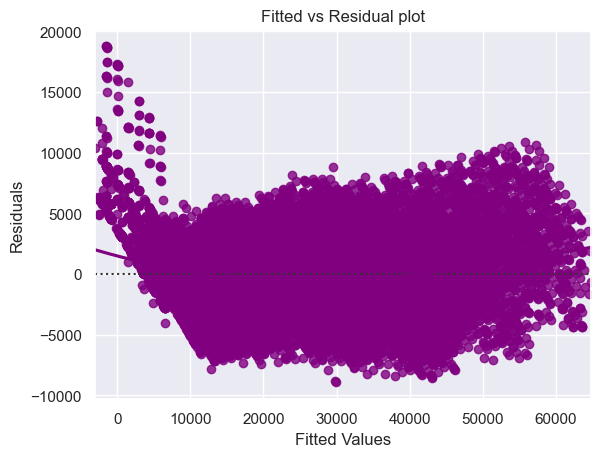

In [227]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

### Test for Normality

**Why the test?**

* Error terms, or residuals, should be normally distributed. If the error terms are not normally distributed, confidence intervals may become too wide or narrow. Once confidence interval becomes unstable, it leads to difficulty in estimating coefficients based on minimization of least squares. Non-normality suggests that there are a few unusual data points that must be studied closely to make a better model.

**How to check normality?**

* The shape of the histogram of residuals can give an initial idea about the normality.
* It can also be checked via a Q-Q plot of residuals. If the residuals follow a normal distribution, they will make a straight line plot, otherwise not.
* Other tests to check for normality includes the Shapiro-Wilk test.
    - Null hypothesis: Residuals are normally distributed
    - Alternate hypothesis: Residuals are not normally distributed

**How to fix if this assumption is not followed?**

* We can apply transformations like log, exponential, arcsinh, etc. as per our data.

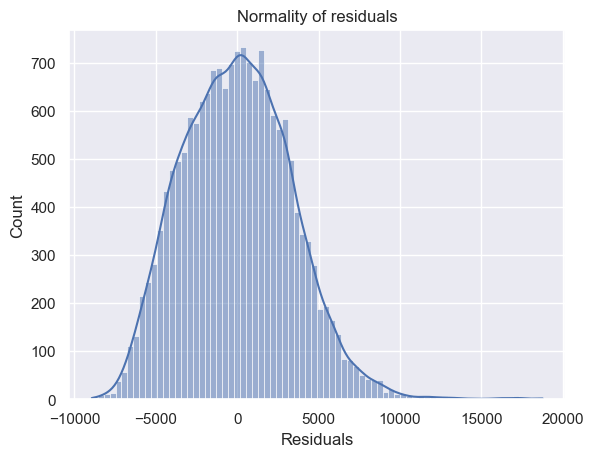

In [229]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

* The histogram of residuals does have a bell shape.
* Let's check the Q-Q plot.

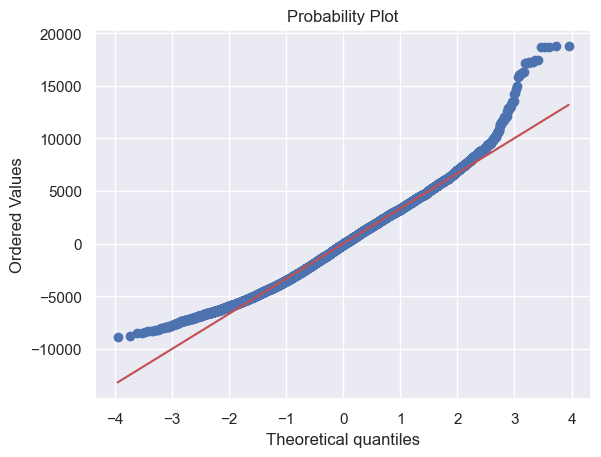

In [231]:
import pylab
import scipy.stats as stats


stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

* The residuals more or less follow a straight line except for the tails.
* Let's check the results of the Shapiro-Wilk test.

In [233]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9881370009861654, pvalue=2.0678052801854352e-35)

* Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.
* Strictly speaking, the residuals are not normal.
* However, as an approximation, we can accept this distribution as close to being normal.
* So, the assumption is satisfied.

### TEST FOR HOMOSCEDASTICITY

* **Homoscedascity**: If the variance of the residuals is symmetrically distributed across the regression line, then the data is said to be homoscedastic.

* **Heteroscedascity**: If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic.

**Why the test?**

* The presence of non-constant variance in the error terms results in heteroscedasticity. Generally, non-constant variance arises in presence of outliers.

**How to check for homoscedasticity?**

* The residual vs fitted values plot can be looked at to check for homoscedasticity. In the case of heteroscedasticity, the residuals can form an arrow shape or any other non-symmetrical shape.
* The goldfeldquandt test can also be used. If we get a p-value > 0.05 we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.
    - Null hypothesis: Residuals are homoscedastic
    - Alternate hypothesis: Residuals have heteroscedasticity

**How to fix if this assumption is not followed?**

* Heteroscedasticity can be fixed by adding other important features or making transformations.

In [235]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip


name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3)
lzip(name, test)

[('F statistic', 1.0021299907290038), ('p-value', 0.4604222008267006)]

**Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied.**

## Final Model

* Now that we have checked all the assumptions of linear regression and they are satisfied, we can check the model performance.

In [237]:
x_train_final = x_train4.copy()
x_test_final = x_test4.copy()

In [239]:
olsmodel_final = sm.OLS(y_train, x_train_final).fit()
print(olsmodel_final.summary())

                            OLS Regression Results                            
Dep. Variable:         insurance_cost   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 5.031e+04
Date:                Sat, 28 Jun 2025   Prob (F-statistic):               0.00
Time:                        21:03:36   Log-Likelihood:            -1.6694e+05
No. Observations:               17500   AIC:                         3.339e+05
Df Residuals:                   17493   BIC:                         3.340e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [241]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    olsmodel_final, x_train_final, y_train
)
olsmodel_final_train_perf

Training Performance



RMSE          MAE  R-squared  Adj. R-squared       MAPE
0  3363.102908  2702.192815   0.945222        0.945194  15.152233

In [243]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(
    olsmodel_final, x_test_final, y_test
)
olsmodel_final_test_perf

Test Performance



RMSE          MAE  R-squared  Adj. R-squared       MAPE
0  3321.75315  2689.953861   0.945397        0.945332  14.918289

In [245]:
# test performance comparison

models_test_comp_df = pd.concat(
    [olsmodel_test_perf.T, olsmodel_final_test_perf.T],
    axis=1,
)

models_test_comp_df.columns = [
    "Linear Regression (initial)",
    "Linear Regression (final)",
]

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


Linear Regression (initial)  Linear Regression (final)
RMSE                            3322.303772                3321.753150
MAE                             2690.187342                2689.953861
R-squared                          0.945379                   0.945397
Adj. R-squared                     0.945152                   0.945332
MAPE                              14.923196                  14.918289

**Observations:**
1. With our linear regression model, we have been able to capture ~94 of the variation in our data.
2. The model indicates that the most significant factors affecting the _insurance cost_ are the following:
   - regular checkup last year
   - weight
   - weight change in last 1 year
   - year since admission
   - insurance covered by other company

### Conclusion to the linear regression model:
* **Weight** is an important feature,as it gave the strongest positive correlation. Its also a part of promoting a healthy lifestyle because if you have a regular weight management, it may reduce the insurance premiums in long-term.
* **Weight Change in Last 1 Year** insighted, either gain or loss of weight indicates health instability. By avoiding the unhealthy fluctuations can signal health risks to the insurance company.
*  **Regular Checkup Last Year** reflects the health monitoring habits of an individual. Insurance companies can encourage their healthy behaviour by offering low premiums to those customers following preventive checkups and follow-ups.
*  **Years Since Admission** is an another feature based on claims history. Therefore, target long-tenure clients with customised wellness plan to manage their health risks and thereby reduce the impact of insurance cost.
*  If an additional insurance coverage split the risk, mainly reducing the insurance cost. Collaberate with users having more insurance coverages in other companies.

### Classification And Regression tree analysis (CART)

In [247]:
df3 = df_lr.copy() # To maintain the original data

In [249]:
df3.isnull().sum()

years_of_insurance_with_us        0
regular_checkup_last_year         0
adventure_sports                  0
Occupation                        0
visited_doctor_last_1_year        0
daily_avg_steps                   0
age                               0
heart_decs_history                0
other_major_decs_history          0
Gender                            0
avg_glucose_level                 0
smoking_status                    0
weight                            0
covered_by_any_other_company      0
Alcohol                           0
exercise                          0
weight_change_in_last_one_year    0
fat_percentage                    0
insurance_cost                    0
cholesterol_level_encoded         0
bmi_category                      0
Years_since_admission             0
dtype: int64

In [251]:
# defining a function to compute different metrics to check performance of a regression model built using sklearn
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def model_performance_regression_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables (X)
    target: dependent variable (y)
    """
    
    # predicting using the model
    pred = model.predict(predictors)
    
    # compute metrics
    rmse = mean_squared_error(target, pred, squared=False)  # RMSE
    mae = mean_absolute_error(target, pred)                 # MAE
    r2 = r2_score(target, pred)                             # R-squared
    mape = (np.abs((target - pred) / target).replace([np.inf, -np.inf], np.nan).dropna()).mean() * 100  # MAPE
    
    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": [rmse],
            "MAE": [mae],
            "R-squared": [r2],
            "MAPE": [mape],
        }
    )

    return df_perf


In [253]:
def residual_plot_sklearn(model, predictors, target):
    """
    Function to plot residuals vs predicted values for regression

    model: trained regression model
    predictors: X values
    target: y values
    """
    pred = model.predict(predictors)
    residuals = target - pred

    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=pred, y=residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title("Residuals vs Predicted")
    plt.show()


## Decision Tree Regressor

In [255]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

**The target variable is continuous. In regression models, Mean Squared Error (MSE) or Mean Absolute Error (MAE) as the splitting criterion**

In [257]:
## Split your data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [259]:
## Initialize the regressor
dt_reg = DecisionTreeRegressor(criterion='squared_error', random_state=42)  # 'squared_error' = MSE

In [261]:
# Train the model
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [263]:
# Predict
y_pred = dt_reg.predict(X_test)

In [265]:
# Evaluate
print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R2 Score: 0.9086828751866696
MAE: 3340.3557333333333
MSE: 18645436.600533333


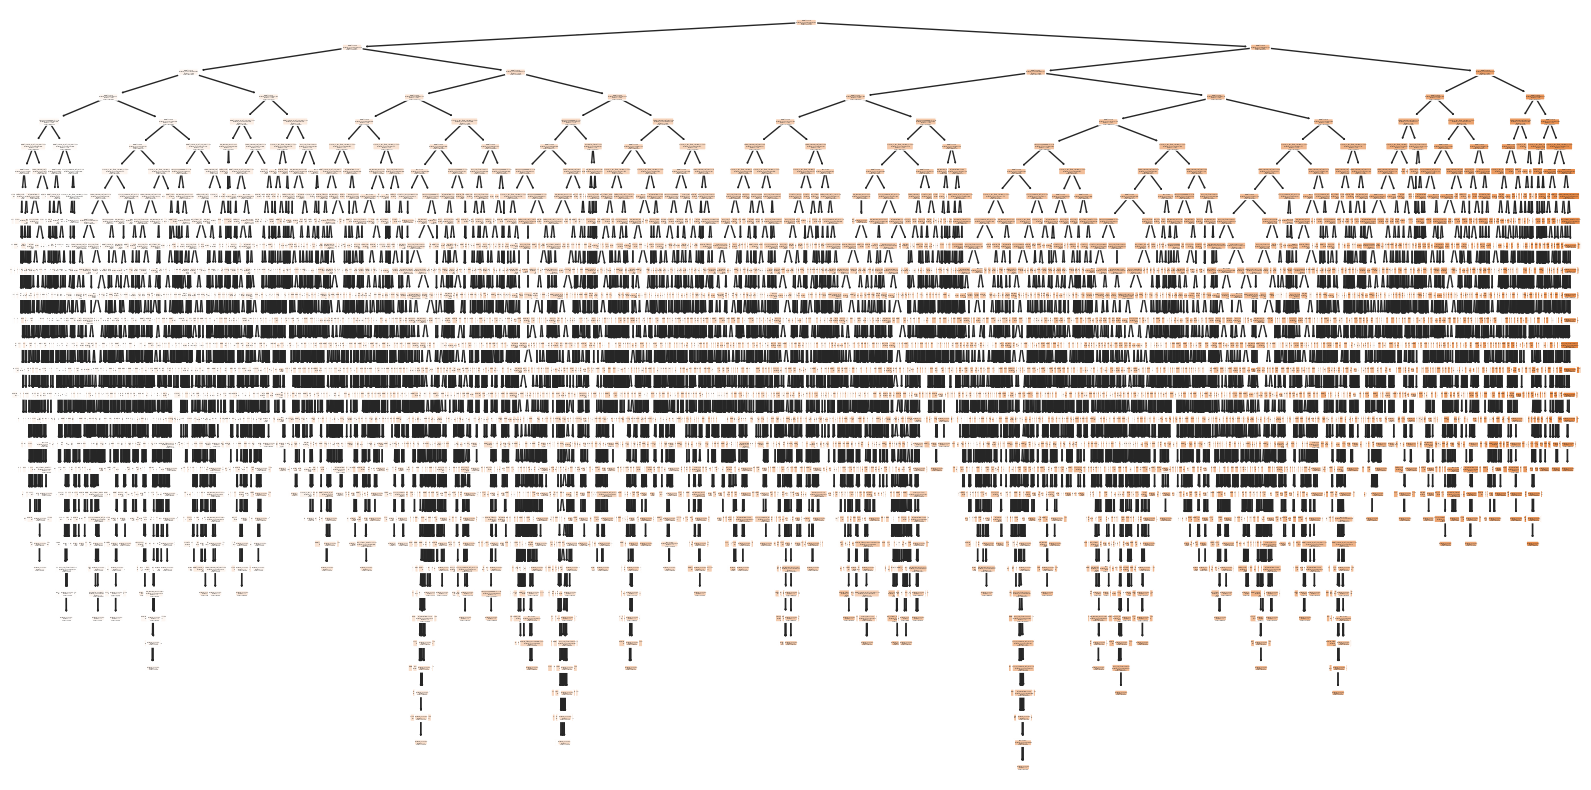

In [274]:
# Plot the tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(dt_reg, feature_names=X.columns, filled=True, rounded=True)
plt.show()

### Check for overfitting

**Checking on train set data**

In [201]:
y_train_pred = dt_reg.predict(X_train)

print("Training Performance:")
print("R² Score:", r2_score(y_train, y_train_pred))
print("MAE:", mean_absolute_error(y_train, y_train_pred))
print("MSE:", mean_squared_error(y_train, y_train_pred))

Training Performance:
R² Score: 1.0
MAE: 0.0
MSE: 0.0


**Checking on test set data**

In [203]:
y_test_pred = dt_reg.predict(X_test)

print("Test Performance:")
print("R² Score:", r2_score(y_test, y_test_pred))
print("MAE:", mean_absolute_error(y_test, y_test_pred))
print("MSE:", mean_squared_error(y_test, y_test_pred))

Test Performance:
R² Score: 0.9087912616949851
MAE: 3345.7853333333333
MSE: 18623305.88


**Observations** 
* The R-squared value of train seems to be high when compared to the test
* The MAE/MSE are lower on train data and higher on the test set
* The data is **overfitting**

### Pruning 

In [205]:
dt_reg1 = DecisionTreeRegressor(max_depth=5, min_samples_split=10, random_state=42)
dt_reg1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_split=10, random_state=42)

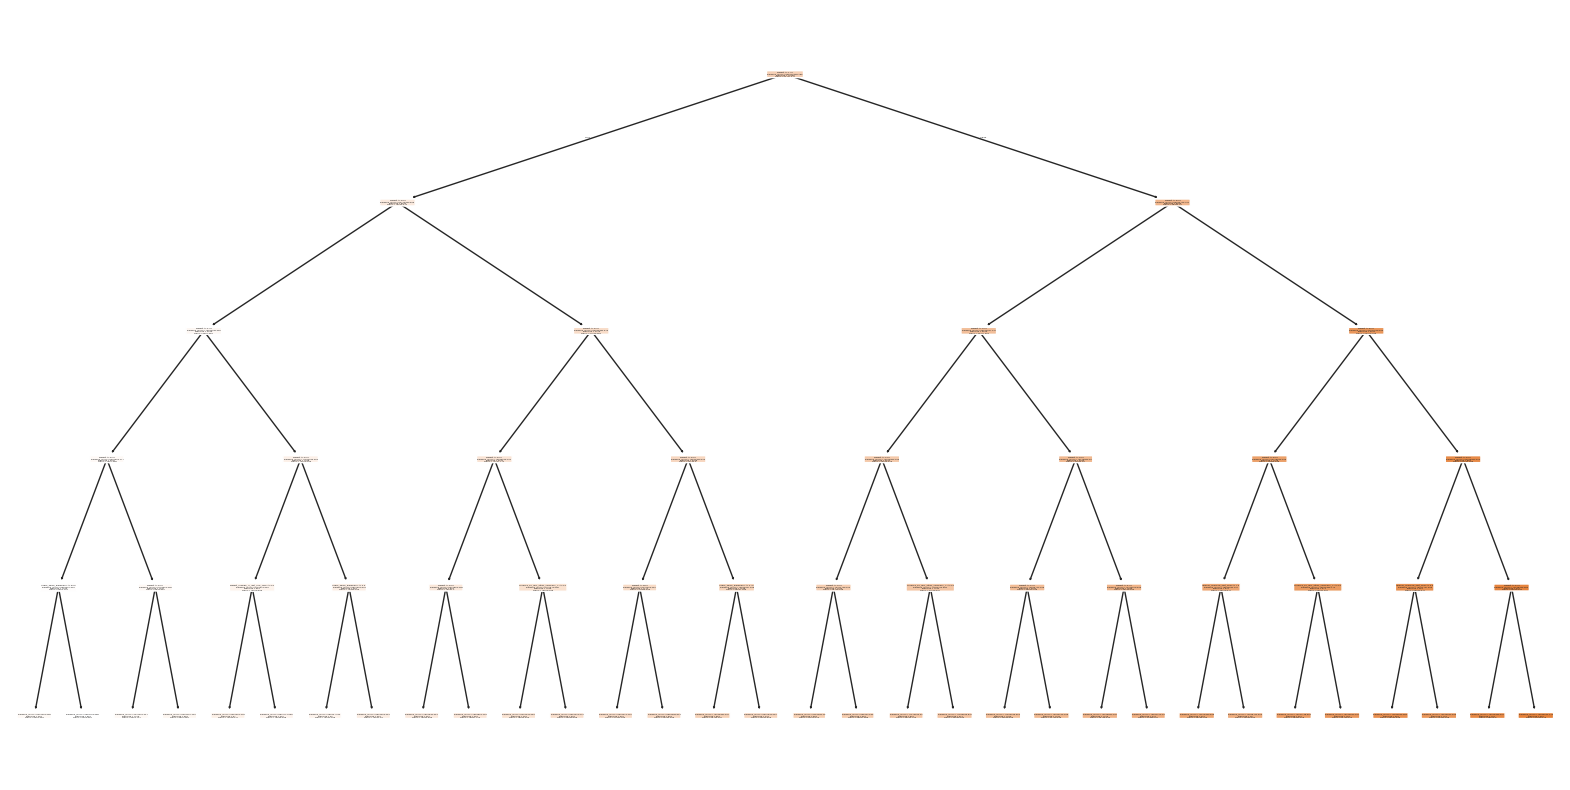

In [213]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(dt_reg1, feature_names=X_train.columns, filled=True, rounded=True)
plt.show()

In [215]:
#Rechecking on training data
y_train_pred1 = dt_reg1.predict(X_train)

print("Training Performance:")
print("R² Score:", r2_score(y_train, y_train_pred1))
print("MAE:", mean_absolute_error(y_train, y_train_pred1))
print("MSE:", mean_squared_error(y_train, y_train_pred1))

Training Performance:
R² Score: 0.9518715191208009
MAE: 2532.861191556653
MSE: 9894087.478723148


In [217]:
#rechecking on test data
y_test_pred1 = dt_reg1.predict(X_test)

print("Test Performance:")
print("R² Score:", r2_score(y_test, y_test_pred1))
print("MAE:", mean_absolute_error(y_test, y_test_pred1))
print("MSE:", mean_squared_error(y_test, y_test_pred1))

Test Performance:
R² Score: 0.9513273471049658
MAE: 2525.739802774426
MSE: 9938145.398130689


* The data is not **overfitting**

### Hypertuning of DecisionTree Regressor

In [223]:
from sklearn import metrics
from sklearn.model_selection import GridSearchCV


#Choose the type of classifier.
dtree_regressor = DecisionTreeRegressor(random_state=42)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30),
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.mean_squared_error,greater_is_better = False)

# Run the grid search
grid_obj = GridSearchCV(dtree_regressor, parameters, scoring=scorer,cv =5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_regressor = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_regressor.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=5, max_leaf_nodes=15,
                      min_impurity_decrease=0.0001, random_state=42)

Training performance:
           RMSE          MAE  R-squared       MAPE
0  3290.813375  2650.349398   0.947322  13.765495
Testing performance:
           RMSE          MAE  R-squared      MAPE
0  3277.874081  2627.359074   0.947378  13.70102


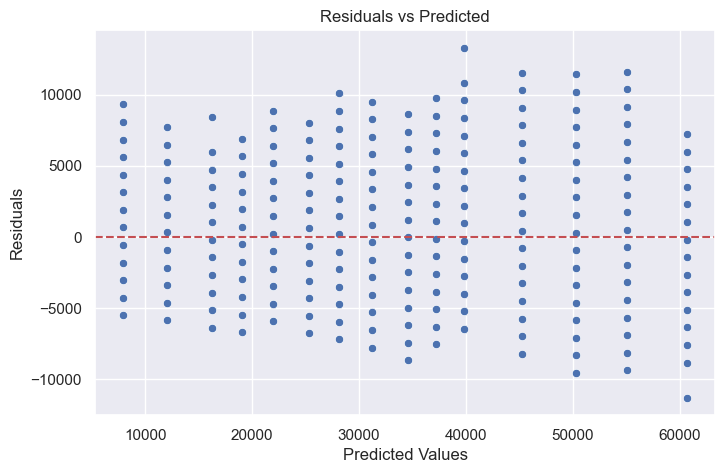

In [332]:
# Calculate different regression metrics (defined using previous function)
dtree_estimator_model_train_perf = model_performance_regression_sklearn(dtree_regressor, X_train, y_train)
print("Training performance:\n", dtree_estimator_model_train_perf)

dtree_estimator_model_test_perf = model_performance_regression_sklearn(dtree_regressor, X_test, y_test)
print("Testing performance:\n", dtree_estimator_model_test_perf)

# Plot residuals for the test set
residual_plot_sklearn(dtree_regressor, X_test, y_test)


## Bagging Regressor - Model building and hypertuning 

### Random forest regressor

Training performance:
           RMSE         MAE  R-squared      MAPE
0  1148.104899  905.589586   0.993588  4.345967
Testing performance:
           RMSE          MAE  R-squared      MAPE
0  3039.037581  2406.795245   0.954767  11.56447


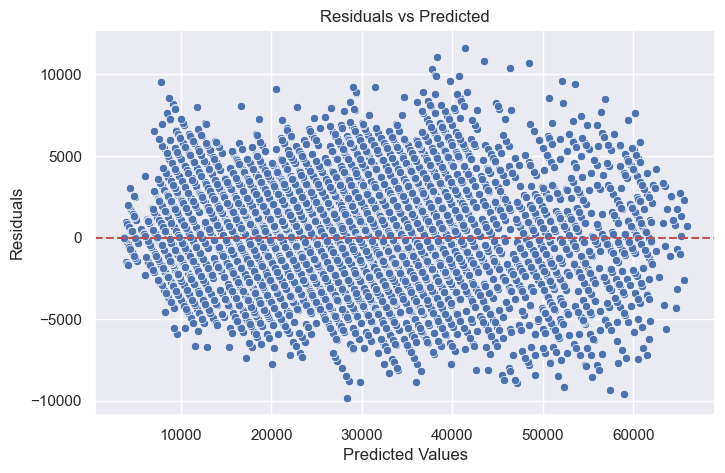

In [227]:
from sklearn.ensemble import RandomForestRegressor

# Fitting the model
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)

# Calculating different metrics
rf_estimator_model_train_perf = model_performance_regression_sklearn(rf_regressor, X_train, y_train)
print("Training performance:\n", rf_estimator_model_train_perf)

rf_estimator_model_test_perf = model_performance_regression_sklearn(rf_regressor, X_test, y_test)
print("Testing performance:\n", rf_estimator_model_test_perf)

# Creating prediction vs actual plot (regression alternative to confusion matrix)
residual_plot_sklearn(rf_regressor, X_test, y_test)


### Hyperparameter tuning

In [229]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor


param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10,  # Try 10 random combinations
    cv=3,
    n_jobs=-1,
    verbose=1
)

random_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 20, None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   verbose=1)

In [233]:
# Fit the model
rf.fit(X_train, y_train)

# Calculating different metrics
rf_tuned_model_train_perf = model_performance_regression_sklearn(rf, X_train, y_train)
print("Training performance:\n", rf_tuned_model_train_perf)

rf_tuned_model_test_perf = model_performance_regression_sklearn(rf, X_test, y_test)
print("Testing performance:\n", rf_tuned_model_test_perf)


Training performance:
           RMSE         MAE  R-squared      MAPE
0  1148.104899  905.589586   0.993588  4.345967
Testing performance:
           RMSE          MAE  R-squared      MAPE
0  3039.037581  2406.795245   0.954767  11.56447


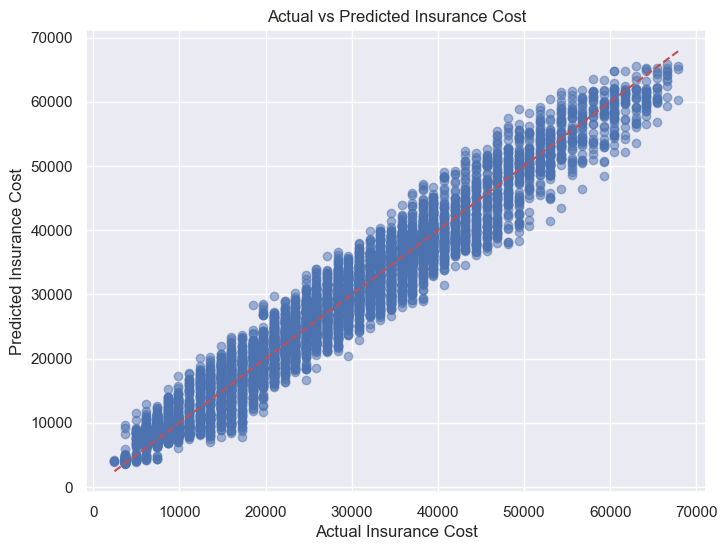

In [235]:
y_pred = rf.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Actual Insurance Cost')
plt.ylabel('Predicted Insurance Cost')
plt.title('Actual vs Predicted Insurance Cost')
plt.grid(True)
plt.show()

* **On average, the predicted insurance cost is off by around 1148 units in training data.**
* The average absolute error is ~905, which is low.
* The model explains ~99.4% of the variance in the training set — very high.
* On average, the predictions are off by ~4.35% — excellent.
* **Model generalizes well, though there's a slight overfitting (difference between training and testing).**

## Bagging Regressor

In [276]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

# Fit Bagging Regressor
bagging_regressor = BaggingRegressor(random_state=42)
bagging_regressor.fit(X_train, y_train)

# Training performance
bagging_regressor_model_train_perf = model_performance_regression_sklearn(bagging_regressor, X_train, y_train)
print("Training performance:\n", bagging_regressor_model_train_perf)

# Testing performance
bagging_regressor_model_test_perf = model_performance_regression_sklearn(bagging_regressor, X_test, y_test)
print("Testing performance:\n", bagging_regressor_model_test_perf)


Training performance:
           RMSE          MAE  R-squared     MAPE
0  1362.764511  1005.040114   0.990966  4.79901
Testing performance:
           RMSE          MAE  R-squared       MAPE
0  3196.083822  2520.255787   0.949972  12.152375


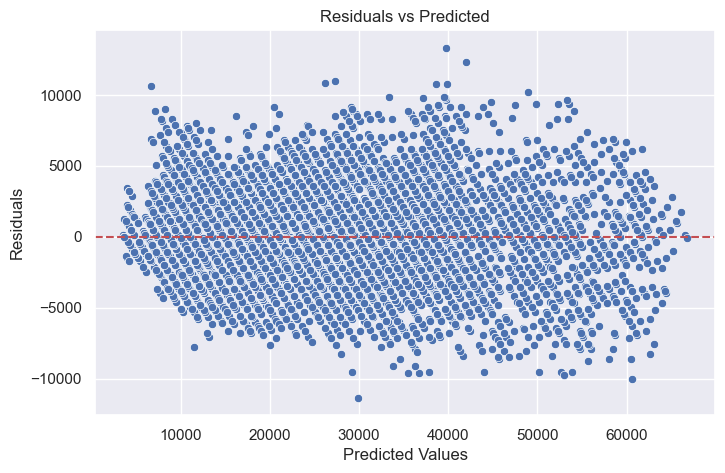

In [278]:
# Creating prediction vs actual plot 
residual_plot_sklearn(bagging_regressor, X_test, y_test)

### Hypertuning - Bagging regressor

In [280]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

bagging = BaggingRegressor(estimator=DecisionTreeRegressor(), random_state=42)

param_dist = {
    'n_estimators': [10, 25, 50, 100],
    'max_samples': np.linspace(0.5, 1.0, 6),
    'max_features': np.linspace(0.5, 1.0, 6)
}

random_search = RandomizedSearchCV(
    estimator=bagging,
    param_distributions=param_dist,
    n_iter=10,  # Try 10 random combinations
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

random_search.fit(X_train, y_train)
print("Best Params:", random_search.best_params_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Params: {'n_estimators': 10, 'max_samples': 0.8, 'max_features': 1.0}


In [282]:
random_search.fit(X_train, y_train)

# Training performance
bagging_estimator_tuned_model_train_perf = model_performance_regression_sklearn(random_search, X_train, y_train)
print("Training performance:\n", bagging_estimator_tuned_model_train_perf)

# Testing performance
bagging_estimator_tuned_model_test_perf = model_performance_regression_sklearn(random_search, X_test, y_test)
print("Testing performance:\n", bagging_estimator_tuned_model_test_perf)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Training performance:
           RMSE          MAE  R-squared      MAPE
0  1603.857969  1207.437269   0.987487  5.790647
Testing performance:
           RMSE          MAE  R-squared       MAPE
0  3174.722682  2511.222907   0.950638  12.094231


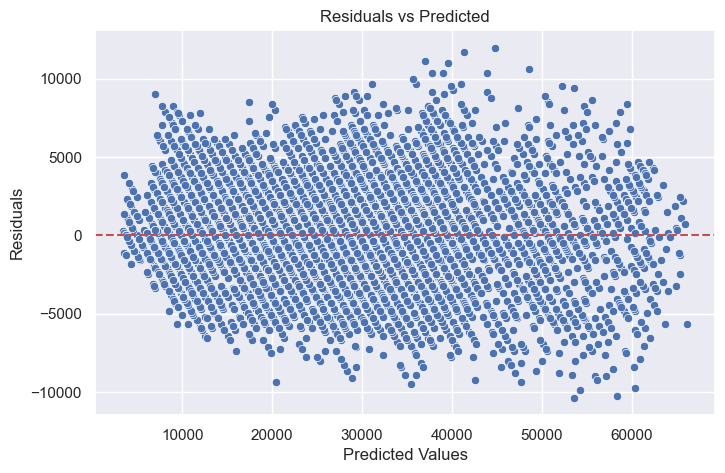

In [285]:
residual_plot_sklearn(random_search, X_test, y_test)

* There is no sign of overfitting, as test R² is still strong.

* MAPE below 12% on test set is decent — depending on your domain, this can be considered accurate.

* Bagging Regressor generalizes well for your problem — good model choice.

## Boosting - Model Building and Hyperparameter Tuning

### AdaBoost Regressor

In [260]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Fitting the AdaBoost Regressor
ab_regressor = AdaBoostRegressor(random_state=1)
ab_regressor.fit(X_train, y_train)

AdaBoostRegressor(random_state=1)

In [273]:
# Fit the model
ab_regressor.fit(X_train, y_train)

# Calculating different metrics
ab_model_train_perf = model_performance_regression_sklearn(ab_regressor, X_train, y_train)
print("Training performance:\n", rf_tuned_model_train_perf)

ab_model_test_perf = model_performance_regression_sklearn(ab_regressor, X_test, y_test)
print("Testing performance:\n", rf_tuned_model_test_perf)


Training performance:
           RMSE         MAE  R-squared      MAPE
0  1148.104899  905.589586   0.993588  4.345967
Testing performance:
           RMSE          MAE  R-squared      MAPE
0  3039.037581  2406.795245   0.954767  11.56447


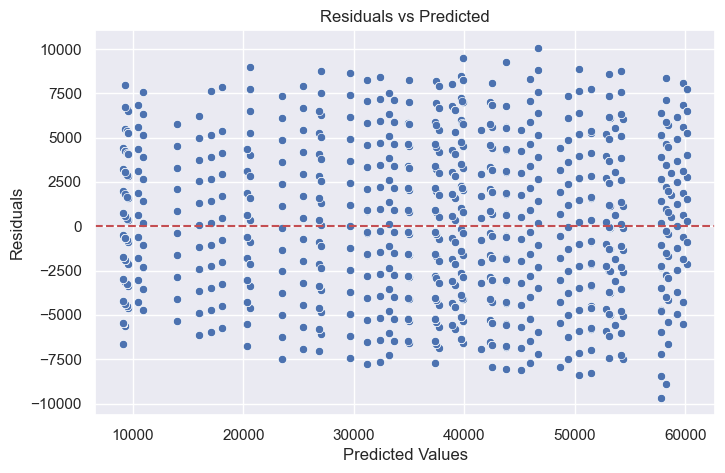

In [275]:
residual_plot_sklearn(ab_regressor, X_test, y_test)

### Hyper parameter tuning- AdaBoosting Regressor

In [277]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
import numpy as np

# Define base model
ab_regressor = AdaBoostRegressor(random_state=1)

# Define parameter distributions (use `param_distributions` instead of param_grid)
param_dist = {
    "estimator": [
        DecisionTreeRegressor(max_depth=1),
        DecisionTreeRegressor(max_depth=2),
        DecisionTreeRegressor(max_depth=3)
    ],
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": np.linspace(0.1, 2.0, 20)
}

# Define scoring metric for regression
scorer = "neg_mean_squared_error"  # You can also try 'r2'

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=ab_regressor,
    param_distributions=param_dist,
    n_iter=30,              # Number of random combinations to try
    scoring=scorer,
    cv=5,
    random_state=42,
    n_jobs=-1
)

# Fit to training data
random_search.fit(X_train, y_train)

# Get the best estimator
best_ab_random = random_search.best_estimator_

# Fit best estimator on training data
best_ab_random.fit(X_train, y_train)


AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=3),
                  learning_rate=0.7, n_estimators=100, random_state=1)

In [320]:
best_ab_random.fit(X_train, y_train)

# Training performance
aba_estimator_tuned_model_train_perf = model_performance_regression_sklearn(best_ab_random, X_train, y_train)
print("Training performance:\n", bagging_estimator_tuned_model_train_perf)

# Testing performance
aba_estimator_tuned_model_test_perf = model_performance_regression_sklearn(best_ab_random, X_test, y_test)
print("Testing performance:\n", bagging_estimator_tuned_model_test_perf)

Training performance:
           RMSE          MAE  R-squared       MAPE
0  2875.208119  2309.877448   0.959787  11.286928
Testing performance:
           RMSE          MAE  R-squared       MAPE
0  2937.926204  2356.454856   0.957727  11.547602


* The model performs consistently on training and testing sets — which is a good sign.

* R² > 0.94 indicates very strong predictive power.

* Errors (MAE, RMSE) are moderate, and MAPE below 20% is considered acceptable in most business contexts.

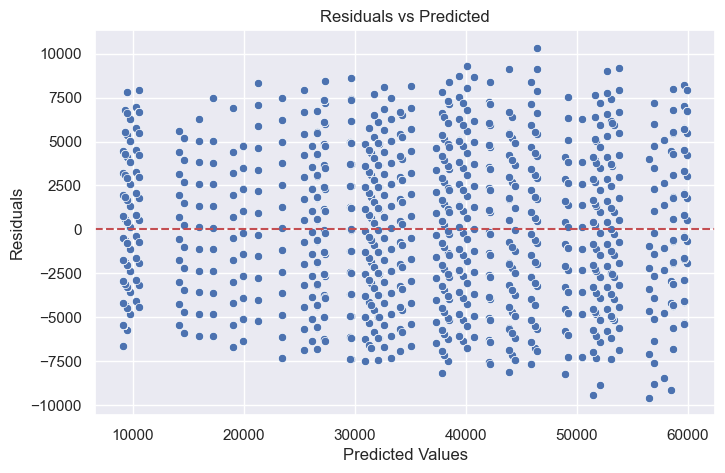

In [282]:
residual_plot_sklearn(best_ab_random, X_test, y_test)

## Gradient Boosting Regressor

In [285]:
from sklearn.ensemble import GradientBoostingRegressor

# Fitting the model
gb_regressor = GradientBoostingRegressor(random_state=1)
gb_regressor.fit(X_train, y_train)

# Calculating different metrics using a regression performance function
gb_model_train_perf = model_performance_regression_sklearn(gb_regressor, X_train, y_train)
print("Training performance:\n", gb_model_train_perf)

gb_model_test_perf = model_performance_regression_sklearn(gb_regressor, X_test, y_test)
print("Testing performance:\n", gb_model_test_perf)


Training performance:
           RMSE          MAE  R-squared       MAPE
0  2947.647987  2371.295267   0.957735  11.386193
Testing performance:
           RMSE          MAE  R-squared      MAPE
0  2964.586602  2384.089906   0.956956  11.48553


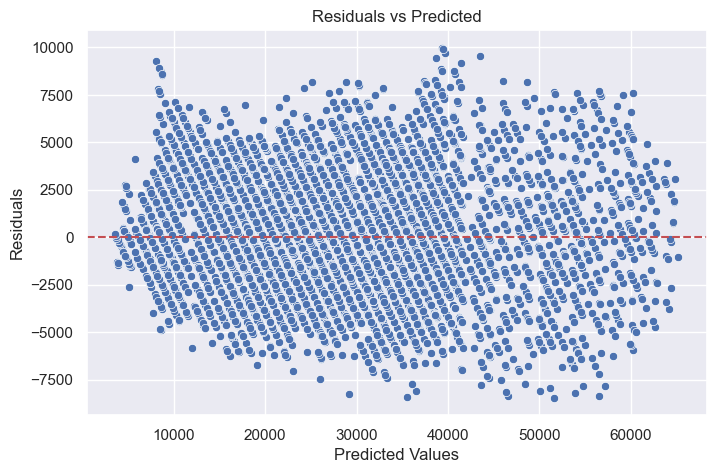

In [287]:
residual_plot_sklearn(gb_regressor, X_test, y_test)

### Hypertuning- Gradient boosting

In [295]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
import numpy as np

# Define the base regressor
gbr = GradientBoostingRegressor(random_state=1)

# Define parameter distribution for randomized search
param_dist = {
    "n_estimators": [100, 150, 200, 250],
    "subsample": [0.8, 0.9, 1.0],
    "max_features": [0.7, 0.8, 0.9, 1.0],
    "learning_rate": np.arange(0.01, 0.3, 0.01),
    "max_depth": [3, 4, 5, 6]
}

# Choose scoring metric for regression
scorer = "neg_mean_squared_error"  # or "r2", "neg_mean_absolute_error", etc.

# Run Randomized Search CV
random_search = RandomizedSearchCV(
    estimator=gbr,
    param_distributions=param_dist,
    scoring=scorer,
    cv=3,
    n_iter=30,         # number of combinations to try
    random_state=1,
    n_jobs=-1
)

# Fit on training data
random_search.fit(X_train, y_train)

# Best estimator
best_gbr = random_search.best_estimator_

# Fit the best model
best_gbr.fit(X_train, y_train)


GradientBoostingRegressor(learning_rate=0.05, max_depth=5, max_features=1.0,
                          n_estimators=150, random_state=1)

In [322]:
best_gbr.fit(X_train, y_train)

# Training performance
gb_estimator_tuned_model_train_perf = model_performance_regression_sklearn(best_gbr, X_train, y_train)
print("Training performance:\n", bagging_estimator_tuned_model_train_perf)

# Testing performance
gb_estimator_tuned_model_test_perf = model_performance_regression_sklearn(best_gbr, X_test, y_test)
print("Testing performance:\n", bagging_estimator_tuned_model_test_perf)

Training performance:
           RMSE          MAE  R-squared       MAPE
0  2875.208119  2309.877448   0.959787  11.286928
Testing performance:
           RMSE          MAE  R-squared       MAPE
0  2937.926204  2356.454856   0.957727  11.547602


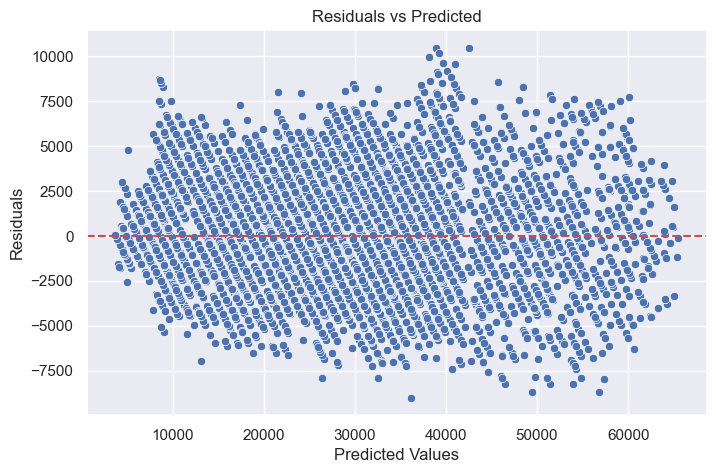

In [299]:
residual_plot_sklearn(best_gbr, X_test, y_test)

* The model is well-fitted and not overfitting — small difference between training and test scores.

* R² > 0.95 indicates a very strong model.

* MAPE < 12% is acceptable in most insurance prediction tasks.

In [304]:
!pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 1.8/150.0 MB 11.2 MB/s eta 0:00:14
   - -------------------------------------- 3.9/150.0 MB 10.2 MB/s eta 0:00:15
   - -------------------------------------- 5.5/150.0 MB 9.6 MB/s eta 0:00:16
   - -------------------------------------- 6.3/150.0 MB 8.6 MB/s eta 0:00:17
   - -------------------------------------- 7.1/150.0 MB 7.0 MB/s eta 0:00:21
   -- ------------------------------------- 7.9/150.0 MB 6.4 MB/s eta 0:00:23
   -- ------------------------------------- 8.4/150.0 MB 6.1 MB/s eta 0:00:24
   -- ------------------------------------- 9.2/150.0 MB 5.7 MB/s eta 0:00:25
   -- ------------------------------------- 9.7/150.0 MB 5.5 MB/s eta 0:00:26
   -- ------------------------------------- 10.2/150.0 MB 5.1 MB/s eta 0:00:28
   -- ------------------------------------- 10.7/150.0 MB 4.9 MB/s eta 0:00:29
   --- ------------------------------------ 11.5/150.0 MB 4.7 MB/s 

### XGBoost regressor

In [326]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Fitting the model
xgb_regressor = XGBRegressor(random_state=1, objective='reg:squarederror')  # objective set for regression
xgb_regressor.fit(X_train, y_train)

# Predicting
y_train_pred = xgb_regressor.predict(X_train)
y_test_pred = xgb_regressor.predict(X_test)

# Calculating performance metrics
def model_performance_regression(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return pd.DataFrame({"RMSE": [rmse], "MAE": [mae], "R-squared": [r2], "MAPE": [mape]})

print("Training performance:\n", model_performance_regression(y_train, y_train_pred))
print("Testing performance:\n", model_performance_regression(y_test, y_test_pred))


Training performance:
           RMSE         MAE  R-squared      MAPE
0  2117.233183  1661.54572   0.978195  8.091094
Testing performance:
           RMSE          MAE  R-squared      MAPE
0  3072.006051  2446.715837   0.953781  11.93093


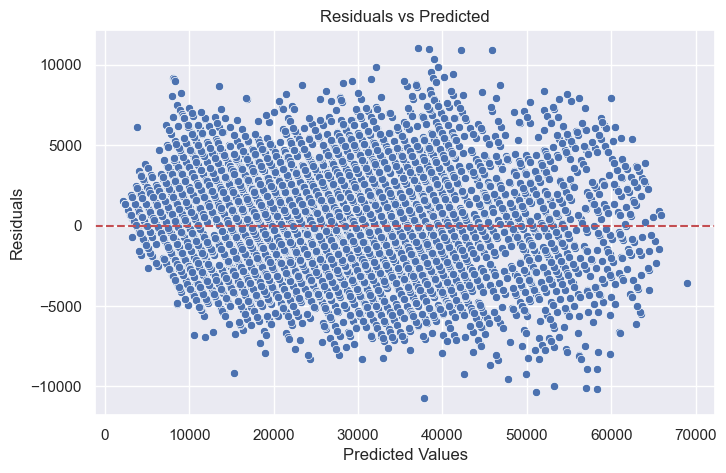

In [308]:
residual_plot_sklearn(xgb_regressor, X_test, y_test)

* XGBoost gave the best balance of accuracy and generalization. With over 95% R-squared and less than 12% error on test data, the model effectively predicts insurance cost based on customer features.

### Hyperparametertuning -XGBoosting regressor

In [311]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
import numpy as np

# Define model
xgb_tuned = XGBRegressor(random_state=1)

# Define parameter grid (keep it small for fast execution)
param_dist = {
    "n_estimators": [50, 100, 150],
    "learning_rate": [0.05, 0.1, 0.2],
    "subsample": [0.7, 0.9, 1],
    "colsample_bytree": [0.7, 0.9, 1],
    "max_depth": [3, 5, 7]
}

# Use appropriate scoring metric
scorer = 'neg_mean_squared_error'  # Or 'r2'

# Run randomized search with fewer iterations (faster)
random_search = RandomizedSearchCV(
    estimator=xgb_tuned,
    param_distributions=param_dist,
    scoring=scorer,
    n_iter=10,         # Try 10 random combinations
    cv=3,
    random_state=1,
    n_jobs=-1
)

# Fit to training data
random_search.fit(X_train, y_train)

# Get best estimator
best_xgb_regressor = random_search.best_estimator_

# Final training
best_xgb_regressor.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, feature_weights=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, ...)

In [328]:
best_xgb_regressor.fit(X_train, y_train)

# Training performance
bestxgb_estimator_tuned_model_train_perf = model_performance_regression_sklearn(best_xgb_regressor, X_train, y_train)
print("Training performance:\n", bagging_estimator_tuned_model_train_perf)

# Testing performance
bestxgb_estimator_tuned_model_test_perf = model_performance_regression_sklearn(best_xgb_regressor, X_test, y_test)
print("Testing performance:\n", bagging_estimator_tuned_model_test_perf)

Training performance:
           RMSE          MAE  R-squared       MAPE
0  2875.208119  2309.877448   0.959787  11.286928
Testing performance:
           RMSE          MAE  R-squared       MAPE
0  2937.926204  2356.454856   0.957727  11.547602


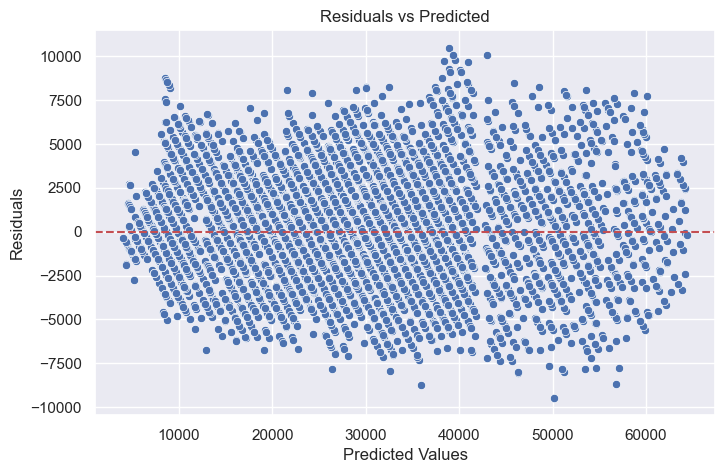

In [317]:
residual_plot_sklearn(best_xgb_regressor, X_test, y_test)

**The XGBoost Regressor achieved an R² of 0.96 on the training set and 0.96 on the test set, with a low MAPE of ~11.5%. This indicates the model effectively captures the relationship between the features and insurance cost, with strong generalization and minimal overfitting**

In [334]:
# training performance comparison

models_train_comp_df = pd.concat(
    [dtree_estimator_model_train_perf.T,rf_tuned_model_train_perf.T,bagging_estimator_tuned_model_train_perf.T,aba_estimator_tuned_model_train_perf.T,gb_estimator_tuned_model_train_perf.T,
    bestxgb_estimator_tuned_model_train_perf.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree Estimator",
    "Random Forest Tuned",
    "Bagging Estimator Tuned",
    "Adabosst Classifier Tuned",
   "Gradient Boost Classifier Tuned",
    "XGBoost Classifier Tuned"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree Estimator  Random Forest Tuned  \
RMSE                   3290.813375          1148.104899   
MAE                    2650.349398           905.589586   
R-squared                 0.947322             0.993588   
MAPE                     13.765495             4.345967   

           Bagging Estimator Tuned  Adabosst Classifier Tuned  \
RMSE                   2875.208119                3261.278989   
MAE                    2309.877448                2689.273159   
R-squared                 0.959787                   0.948263   
MAPE                     11.286928                  15.319856   

           Gradient Boost Classifier Tuned  XGBoost Classifier Tuned  
RMSE                           2814.967617               2875.208119  
MAE                            2257.882674               2309.877448  
R-squared                         0.961455                  0.959787  
MAPE                             10.920485                 11.286928

In [338]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [dtree_estimator_model_test_perf.T,rf_tuned_model_test_perf.T,bagging_estimator_tuned_model_test_perf.T,aba_estimator_tuned_model_test_perf.T,gb_estimator_tuned_model_test_perf.T,
    bestxgb_estimator_tuned_model_test_perf.T],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree Estimator",
    "Random Forest Tuned",
    "Bagging Estimator Tuned",
    "Adabosst Classifier Tuned",
   "Gradient Boost Classifier Tuned",
    "XGBoost Classifier Tuned"]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


Decision Tree Estimator  Random Forest Tuned  \
RMSE                   3277.874081          3039.037581   
MAE                    2627.359074          2406.795245   
R-squared                 0.947378             0.954767   
MAPE                     13.701020            11.564470   

           Bagging Estimator Tuned  Adabosst Classifier Tuned  \
RMSE                   2937.926204                3234.294017   
MAE                    2356.454856                2660.576024   
R-squared                 0.957727                   0.948768   
MAPE                     11.547602                  15.244621   

           Gradient Boost Classifier Tuned  XGBoost Classifier Tuned  
RMSE                           2938.188465               2937.926204  
MAE                            2352.719948               2356.454856  
R-squared                         0.957720                  0.957727  
MAPE                             11.411264                 11.547602

* Random Forest had the best training performance but a slightly higher RMSE on test data.

* Bagging Regressor and XGBoost showed a better balance between training and testing performance, making them great choices if generalization is the priority.

* Avoid using AdaBoost and Decision Tree alone as they showed relatively higher errors and lower R² scores.

### Feature importance on XGBoost Classifier

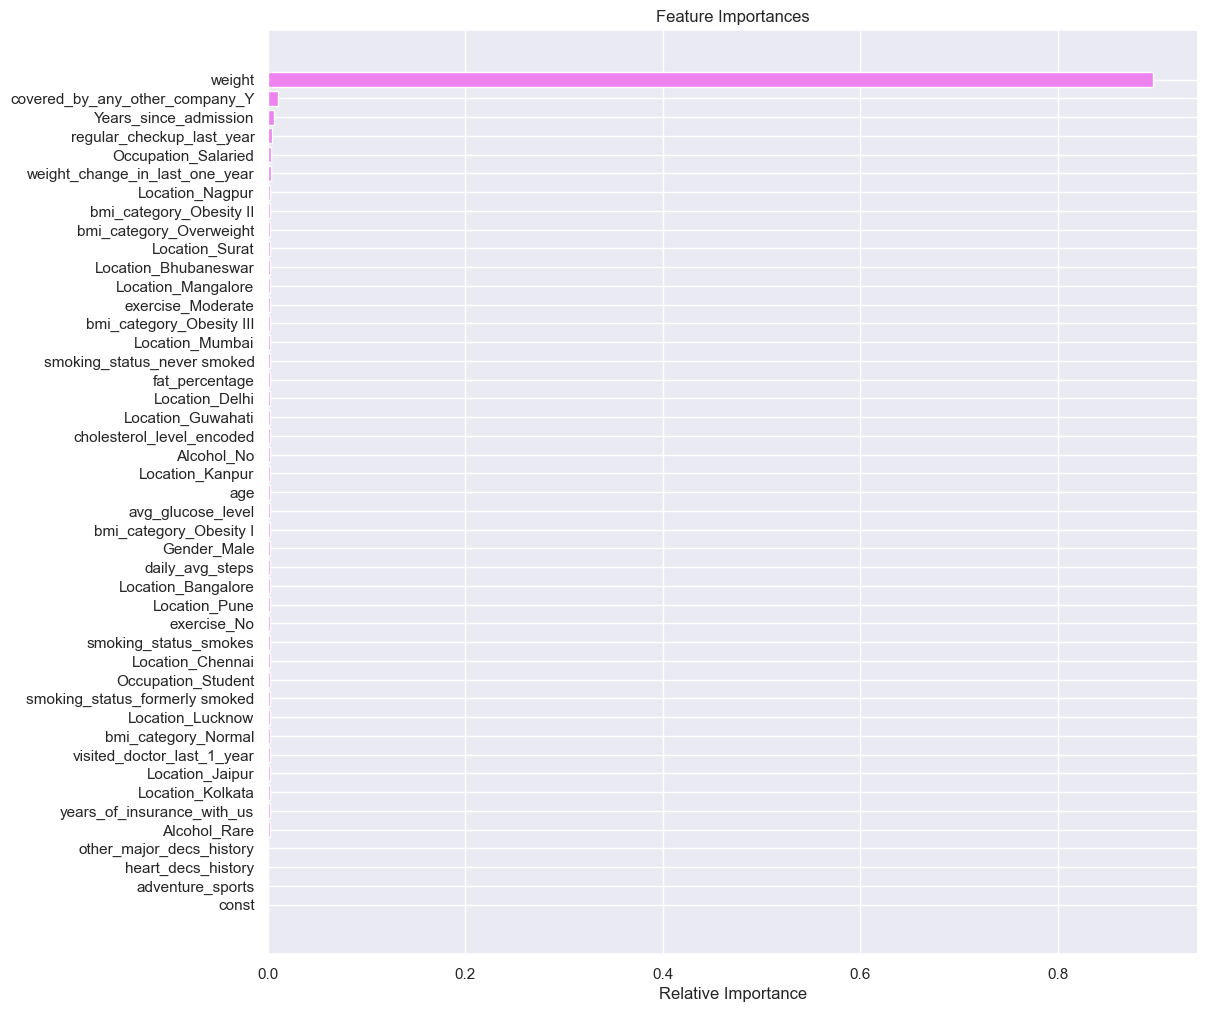

In [360]:
feature_names = X_train.columns
importances = xgb_regressor.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Conclusion:

* Tree-based ensemble models reinforced findings in linear regression, also uncovered more complex annon-linear relationships that linear models may overlook.
* These models are suitable for understanding healthcare patterns and also can offer more predictions in the real-world scenarios, provided that overfitting also involved throughout the tuning models.